In [1]:
import keras
keras.__version__
from keras import backend as K
#K.tensorflow_backend._get_available_gpus()
import tensorflow as tf

from tensorflow.python.client import device_lib
local_device_protos = device_lib.list_local_devices()

for val in local_device_protos:
  print(val.device_type)


D0603 16:21:16.233296330      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0603 16:21:16.233329023      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0603 16:21:16.233332865      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0603 16:21:16.233335704      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0603 16:21:16.233338179      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0603 16:21:16.233340923      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0603 16:21:16.233343597      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0603 16:21:16.

CPU
TPU_SYSTEM
TPU
TPU
TPU
TPU
TPU
TPU
TPU
TPU


## Connect to TPU


In [2]:
import keras
keras.backend.set_session("TPU")

In [3]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 65.3 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 KB 19.2 MB/s eta 0:00:00
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 6.5 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 60.5 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install missingno

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:

import sys
import os
import math

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['figure.dpi'] = 300
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import *

from PIL import Image, ImageEnhance
from tensorflow.keras.preprocessing.image import *

In [8]:
import pathlib
import tensorflow as tf

train_dir = pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Training')
test_dir = pathlib.Path('/kaggle/input/brain-tumor-mri-dataset/Testing')
img_height=224
img_width=224

In [9]:
train_ds  = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=128)


Found 5712 files belonging to 4 classes.
Using 4570 files for training.


In [10]:
test_ds  = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=128)


Found 5712 files belonging to 4 classes.
Using 1142 files for validation.


In [11]:
val_ds  = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=128)


Found 1311 files belonging to 4 classes.


## Visualize the data distribution

In [12]:
ROOT_DIR = r"/kaggle/input/brain-tumor-mri-dataset"
TRAIN_DIR = os.path.join(ROOT_DIR, 'Training')
TEST_DIR = os.path.join(ROOT_DIR, 'Testing')
assert os.path.isdir(ROOT_DIR) and os.path.isdir(TRAIN_DIR) and os.path.isdir(TEST_DIR)
TUMOR_CLASS = ['meningioma', 'glioma', 'pituitary', 'notumor']
IMAGE_DATA_PATHS = [os.path.join(TRAIN_DIR, tumor_class) for tumor_class in TUMOR_CLASS]
TEST_DATA_PATHS = [os.path.join(TEST_DIR, tumor_class) for tumor_class in TUMOR_CLASS]

In [13]:
TEST_DATA_PATHS

['/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/glioma',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary',
 '/kaggle/input/brain-tumor-mri-dataset/Testing/notumor']

In [14]:
data_distribution_count = pd.Series([len(os.listdir(path)) for path in TEST_DATA_PATHS if os.path.exists(path) and os.path.isdir(path)],index = TUMOR_CLASS)
data_distribution_count

meningioma    306
glioma        300
pituitary     300
notumor       405
dtype: int64

In [15]:
data_distribution_count = pd.Series([len(os.listdir(path)) for path in IMAGE_DATA_PATHS if os.path.exists(path) and os.path.isdir(path)],index = TUMOR_CLASS)
data_distribution_count

meningioma    1339
glioma        1321
pituitary     1457
notumor       1595
dtype: int64

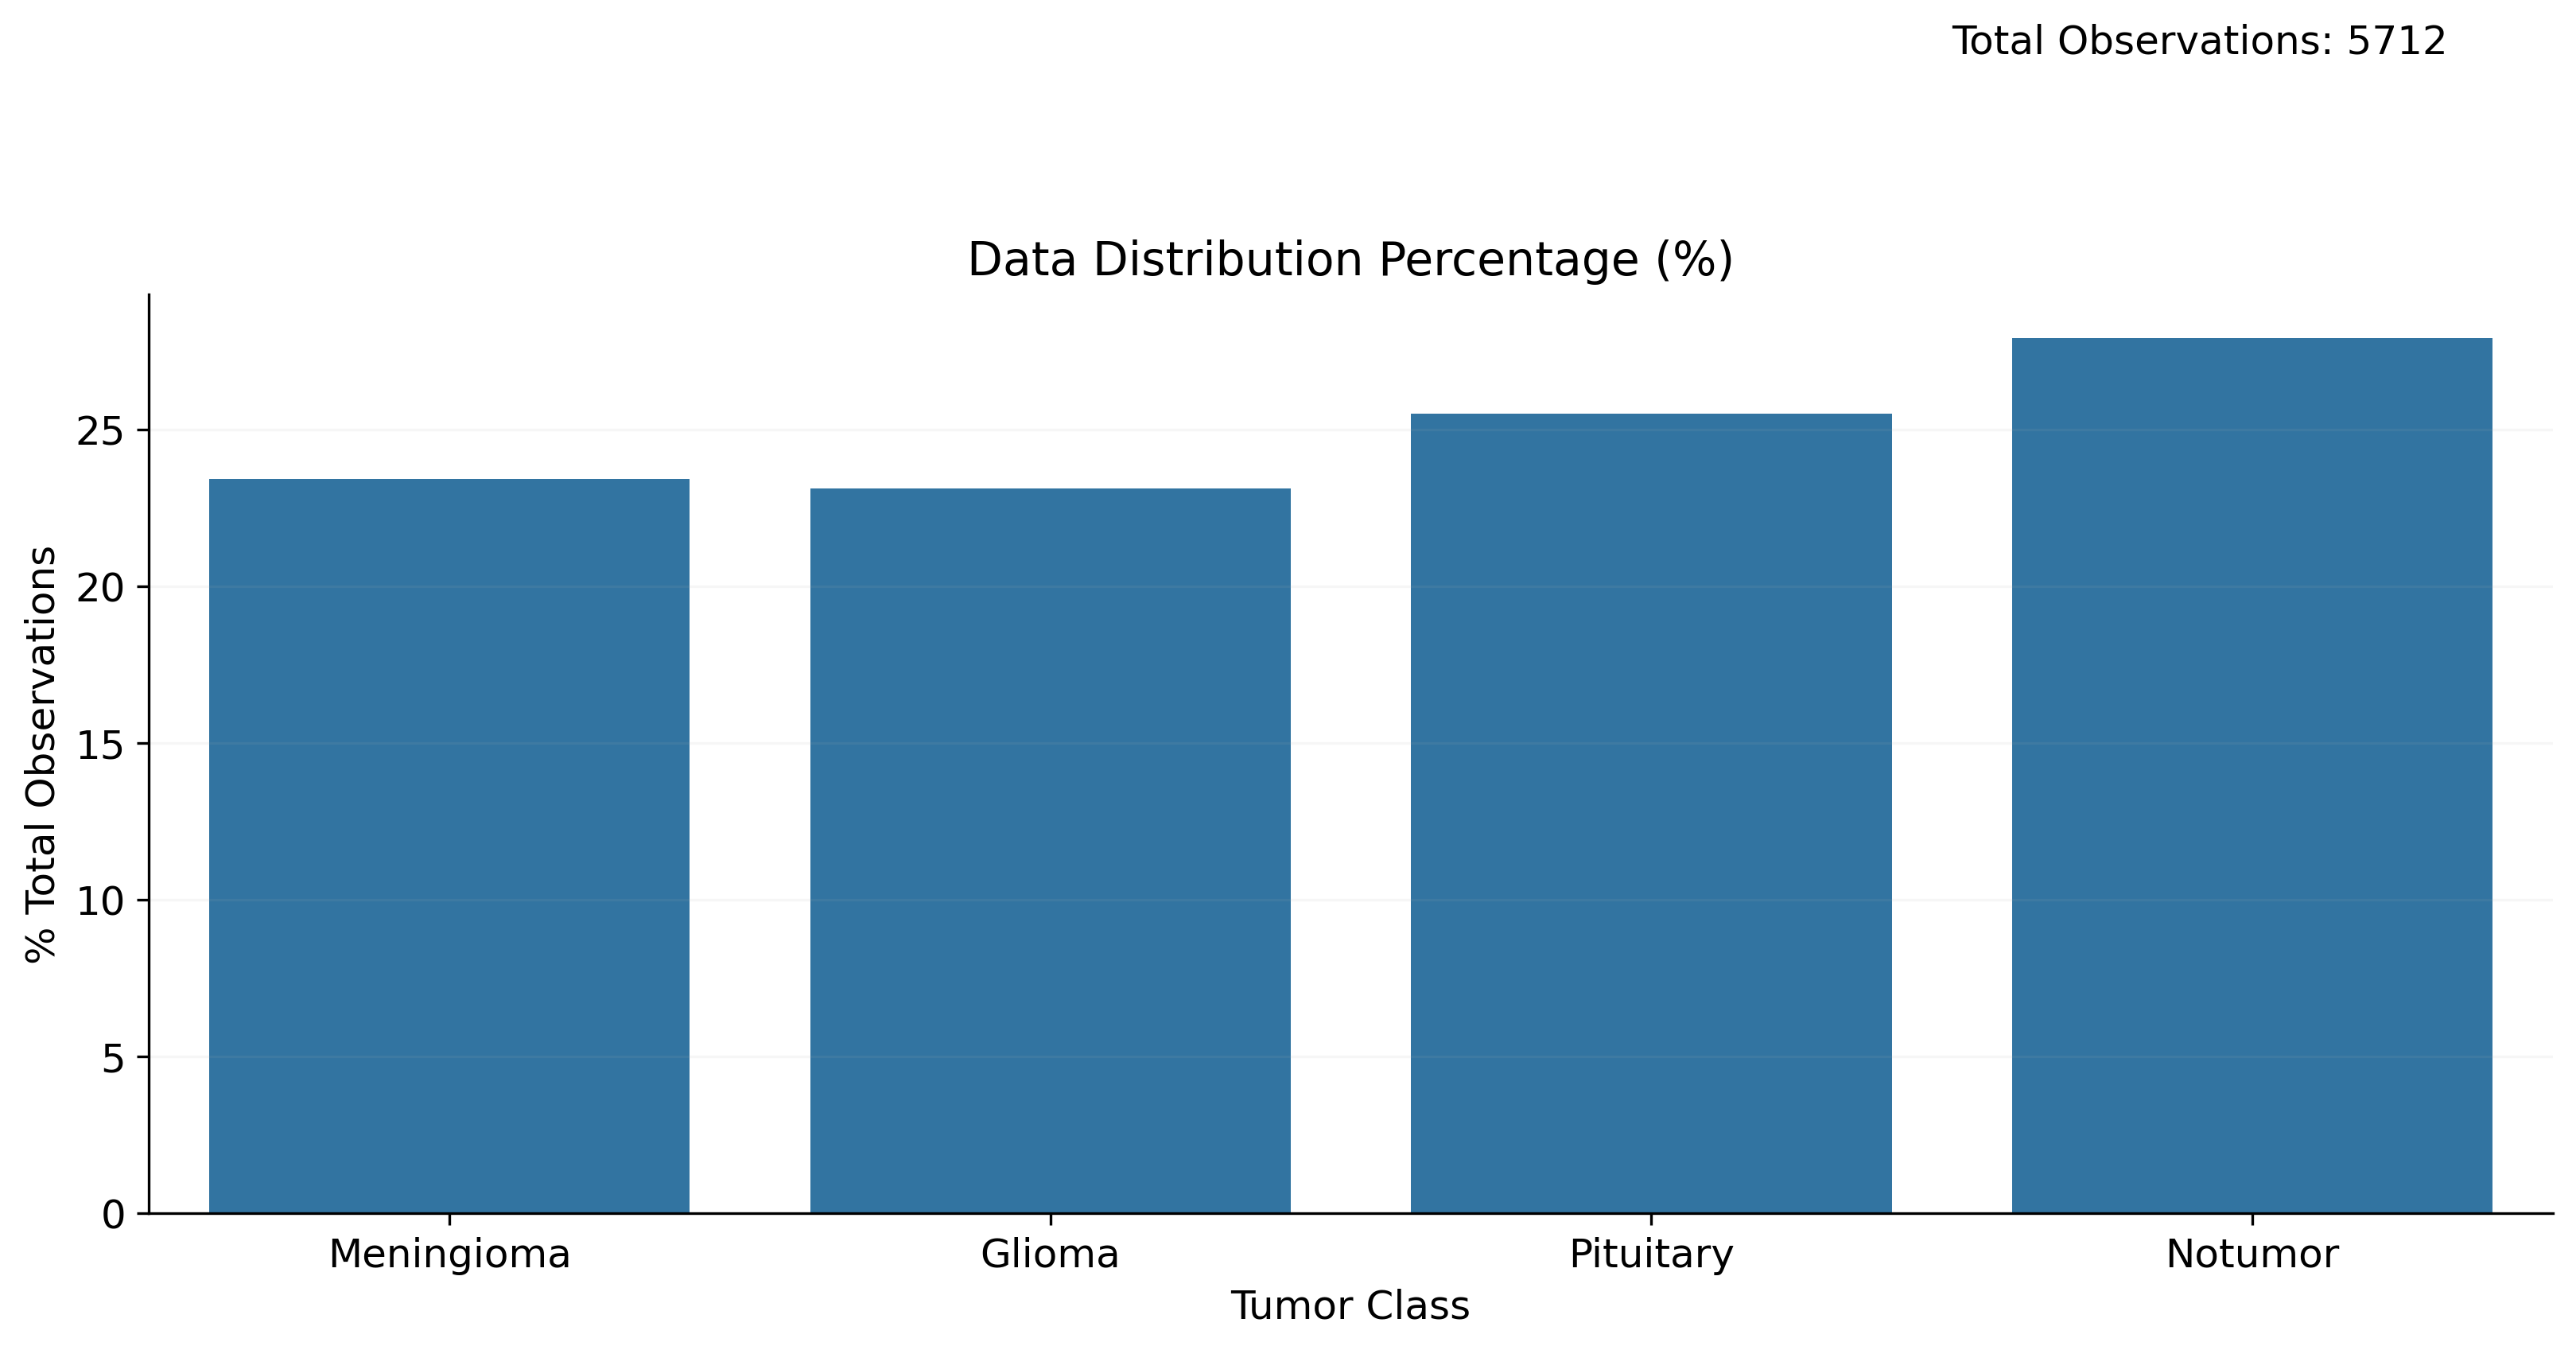

In [16]:
fig, axis = plt.subplots(figsize = (13, 5))
axis.grid(True, alpha = 0.1)
axis.set_title("Data Distribution Percentage (%)", fontsize = 14)
sns.barplot(x = ['\n'.join(curr_index.strip().split('_')).title() for curr_index in data_distribution_count.index],
            y = 100 * (data_distribution_count / data_distribution_count.sum()), ax = axis)
axis.set_xlabel("Tumor Class", fontsize = 12)
axis.set_ylabel("% Total Observations", fontsize = 12)
axis.tick_params(which = 'major', labelsize = 12)
axis.text(2.5, 37, f'Total Observations: {data_distribution_count.sum()}', fontdict = dict(size = 12))
sns.despine()

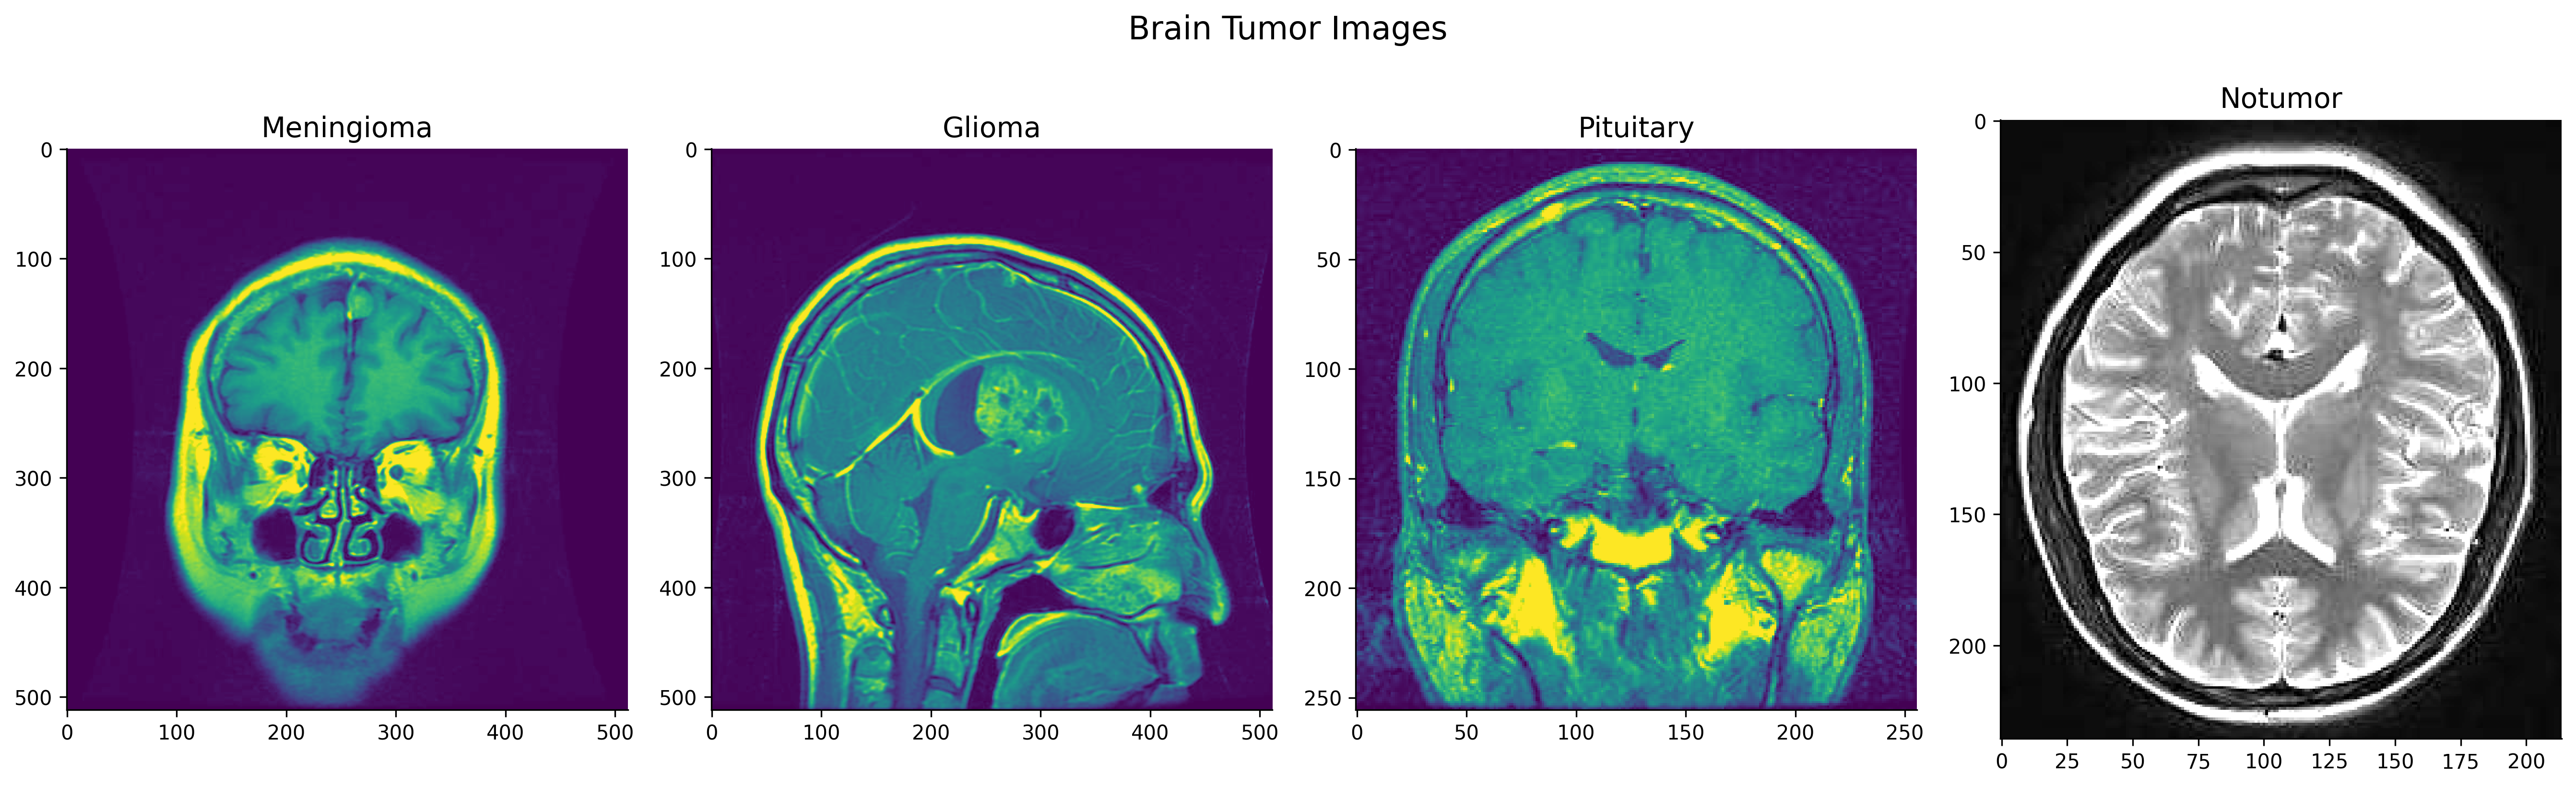

In [17]:
BRIGHTNESS_FACTOR = 1.7
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (18, 5))
axes = axes.flatten()
fig.suptitle("Brain Tumor Images", fontsize = 16, fontdict = dict(weight = 'bold'), y = 1.04)
for curr_title, filename, curr_axis in zip(TUMOR_CLASS, IMAGE_DATA_PATHS, axes[:4]):
    curr_image = Image.open(os.path.join(filename, os.listdir(filename)[2]))
    img_enhancer = ImageEnhance.Brightness(curr_image)
    curr_axis.imshow(img_enhancer.enhance(BRIGHTNESS_FACTOR))
    curr_axis.set_title(" ".join(curr_title.split('_')).title(), fontsize = 14)

fig.tight_layout()
sns.despine()

## Image Augmentation

In [18]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [19]:
import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [20]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 1. Inception V3

In [21]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

# base_model1 = InceptionV3(
#                     input_shape=(224, 224, 3),
#                     weights='imagenet',
#                     include_top=False)
# # Freeze the first 10 layers
# for layer in base_model1.layers[:10]:
#     layer.trainable = False
# x = base_model1.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.4)(x)
# predictions1 = Dense(4, activation='softmax')(x)
# model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [22]:

# instantiating the model in the strategy scope creates the model on the TPU
with tpu_strategy.scope():
    base_model1 = InceptionV3(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False) # define your model normally
    for layer in base_model1.layers[:10]:
        layer.trainable = False
    x = base_model1.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions1 = Dense(4, activation='softmax')(x)
    model1 = Model(inputs=base_model1.inputs, outputs=predictions1)
    model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])



87910968/87910968 [==============================] - 0s 0us/step


In [23]:
# model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [24]:
history1=model1.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model1.save('model1.h5')

Epoch 1/25


2024-06-03 16:23:06.798811: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:23:07.578714: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.6009 - accuracy: 0.7910

2024-06-03 16:24:36.333070: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:24:36.580182: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 142s 2s/step - loss: 0.6009 - accuracy: 0.7910 - val_loss: 19.7457 - val_accuracy: 0.2601
Epoch 2/25
36/36 [==============================] - 4s 119ms/step - loss: 0.2182 - accuracy: 0.9302 - val_loss: 10.2015 - val_accuracy: 0.3538
Epoch 3/25
36/36 [==============================] - 4s 106ms/step - loss: 0.1265 - accuracy: 0.9584 - val_loss: 3.4887 - val_accuracy: 0.5359
Epoch 4/25
36/36 [==============================] - 4s 109ms/step - loss: 0.0792 - accuracy: 0.9737 - val_loss: 0.7669 - val_accuracy: 0.7828
Epoch 5/25
36/36 [==============================] - 4s 108ms/step - loss: 0.0853 - accuracy: 0.9718 - val_loss: 0.4456 - val_accuracy: 0.8774
Epoch 6/25
36/36 [==============================] - 4s 108ms/step - loss: 0.0649 - accuracy: 0.9779 - val_loss: 0.3460 - val_accuracy: 0.8905
Epoch 7/25
36/36 [==============================] - 4s 106ms/step - loss: 0.0616 - accuracy: 0.9814 - val_loss: 0.4876 - val_accuracy: 0.9046
Epoch 8/25
36/36

In [25]:
inceptionv3_evaluation = model1.evaluate(val_ds)
inceptionv3_evaluation[1]*100

11/11 [==============================] - 14s 1s/step - loss: 0.1036 - accuracy: 0.9733


97.33028411865234

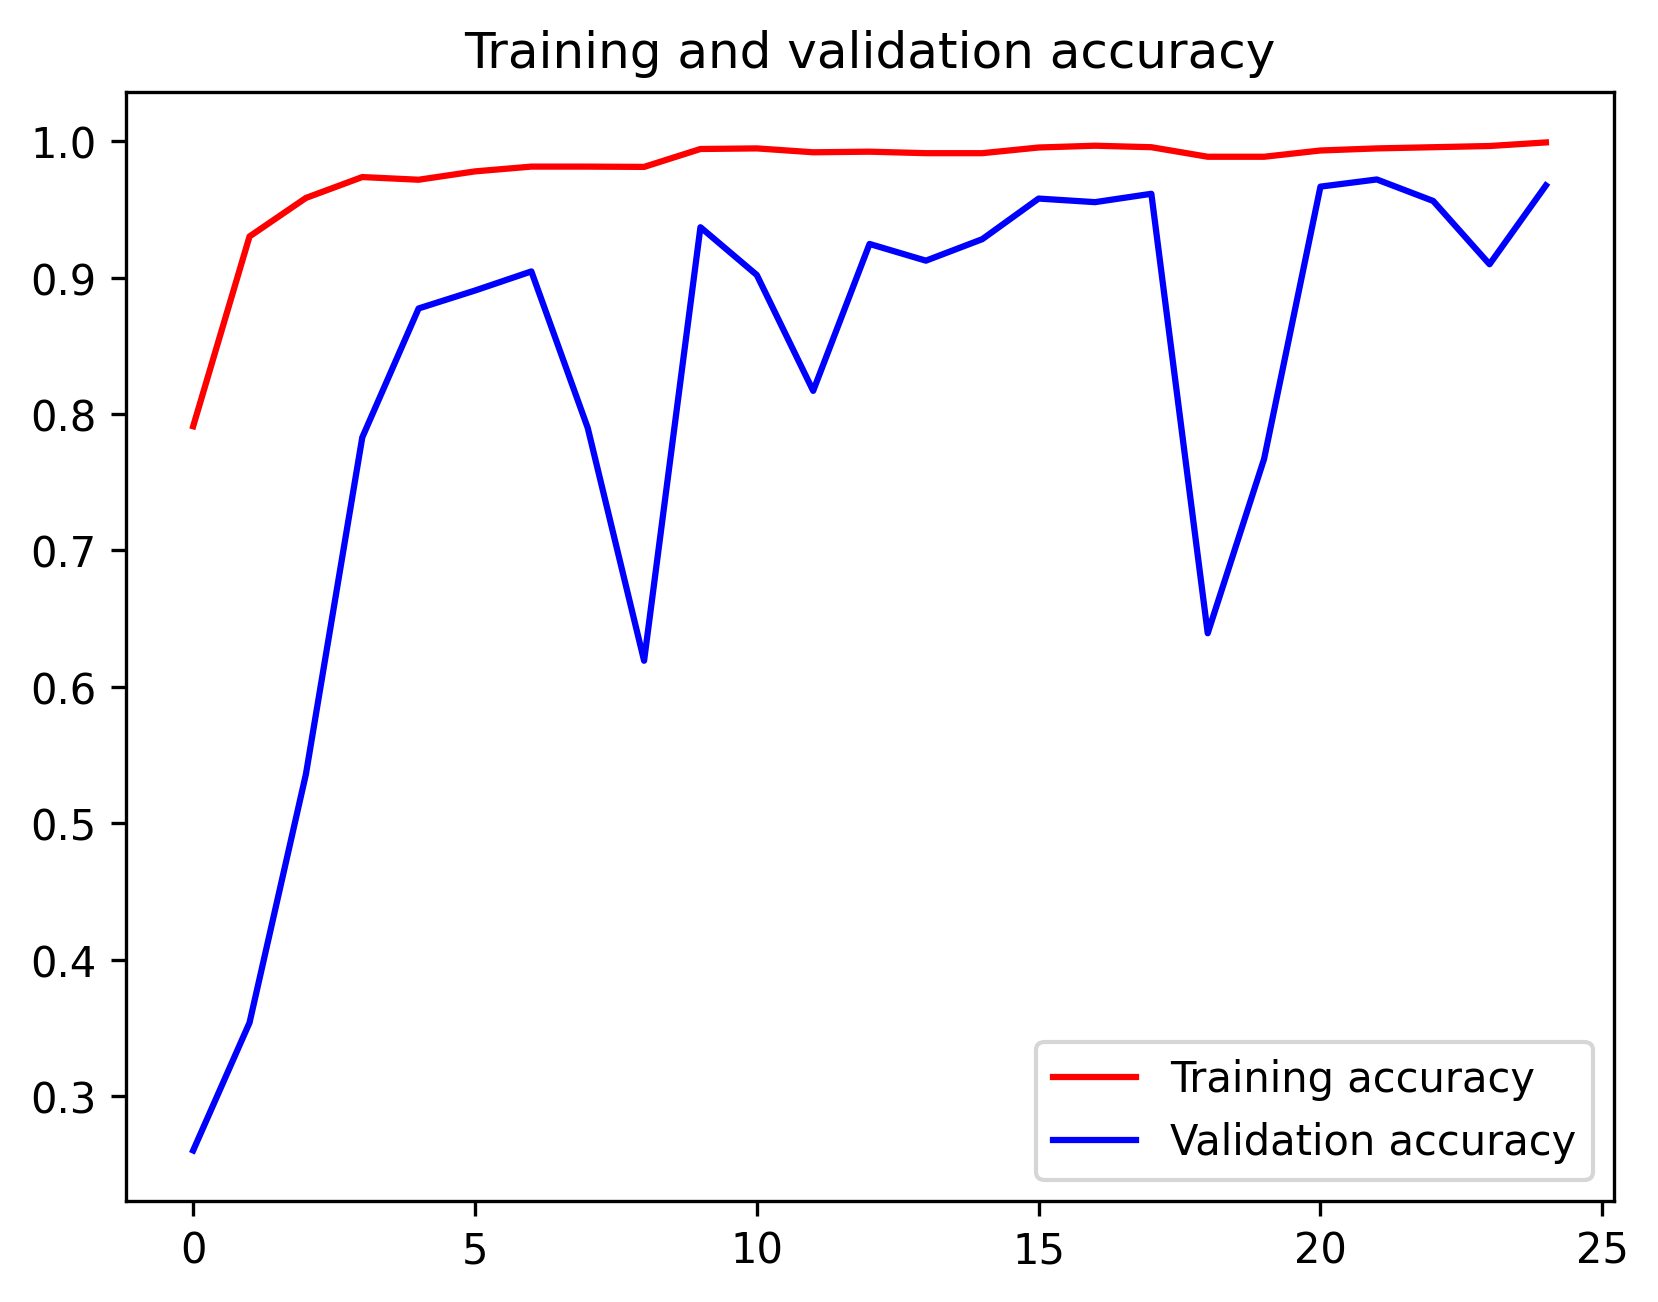

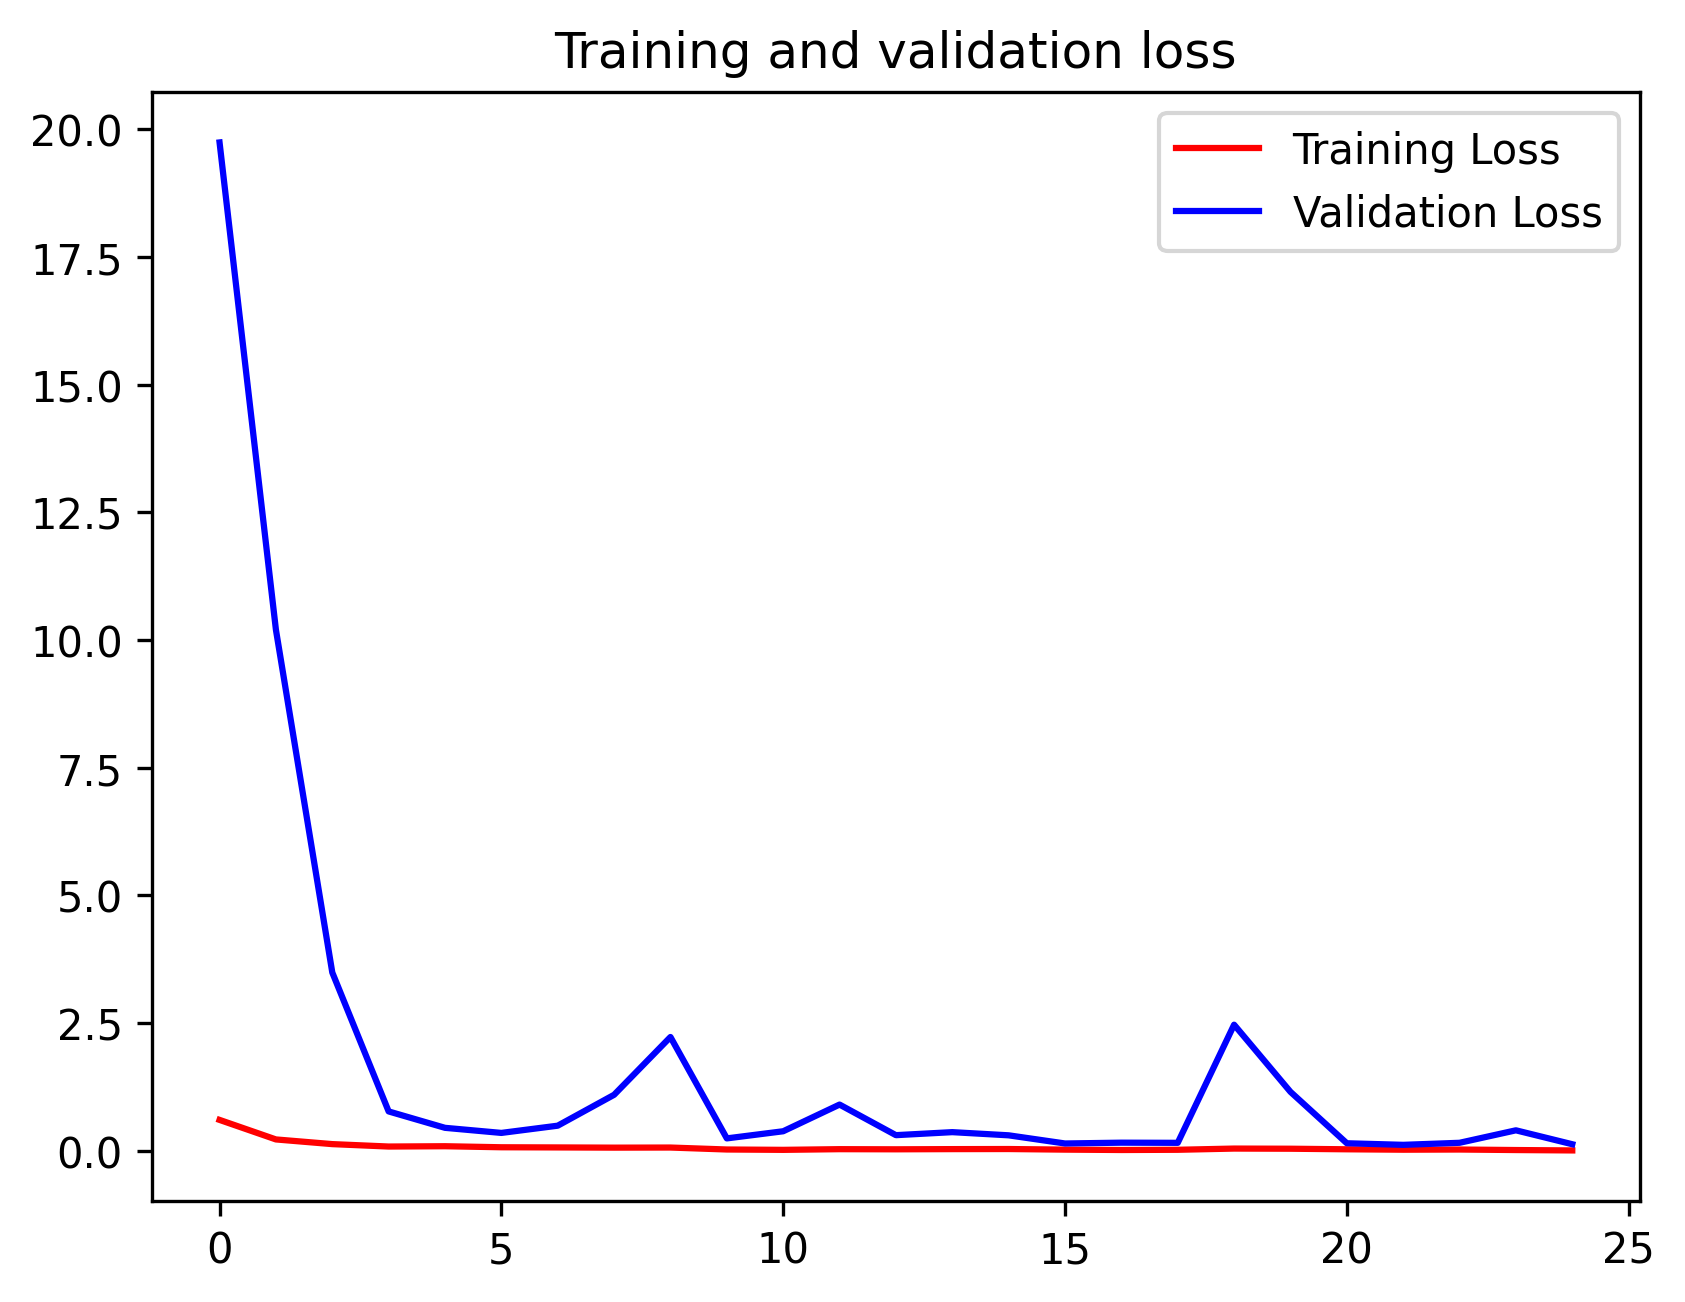

In [26]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 2. VGG16

In [27]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

with tpu_strategy.scope():
    base_model2 = VGG16(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model2.layers:
        layer.trainable = False
    x = base_model2.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions2 = Dense(4, activation='softmax')(x)
    model2 = Model(inputs=base_model2.inputs, outputs=predictions2)
    model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [28]:
# model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history2=model2.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model2.save('model2.h5')

Epoch 1/25


2024-06-03 16:27:14.337192: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:27:14.461556: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 1.5522 - accuracy: 0.6950

2024-06-03 16:27:30.488814: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:27:30.594175: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 30s 608ms/step - loss: 1.5522 - accuracy: 0.6950 - val_loss: 0.3948 - val_accuracy: 0.8774
Epoch 2/25
36/36 [==============================] - 3s 78ms/step - loss: 0.4559 - accuracy: 0.8527 - val_loss: 0.2916 - val_accuracy: 0.9046
Epoch 3/25
36/36 [==============================] - 3s 79ms/step - loss: 0.3203 - accuracy: 0.8873 - val_loss: 0.2629 - val_accuracy: 0.9142
Epoch 4/25
36/36 [==============================] - 3s 77ms/step - loss: 0.2522 - accuracy: 0.9061 - val_loss: 0.2212 - val_accuracy: 0.9212
Epoch 5/25
36/36 [==============================] - 4s 101ms/step - loss: 0.2129 - accuracy: 0.9256 - val_loss: 0.2244 - val_accuracy: 0.9203
Epoch 6/25
36/36 [==============================] - 3s 79ms/step - loss: 0.1812 - accuracy: 0.9328 - val_loss: 0.1966 - val_accuracy: 0.9317
Epoch 7/25
36/36 [==============================] - 3s 81ms/step - loss: 0.1519 - accuracy: 0.9418 - val_loss: 0.2126 - val_accuracy: 0.9221
Epoch 8/25
36/36 [===

In [30]:
vgg16_evaluation = model2.evaluate(val_ds)
vgg16_evaluation[1]*100

11/11 [==============================] - 8s 735ms/step - loss: 0.1834 - accuracy: 0.9405


94.05034184455872

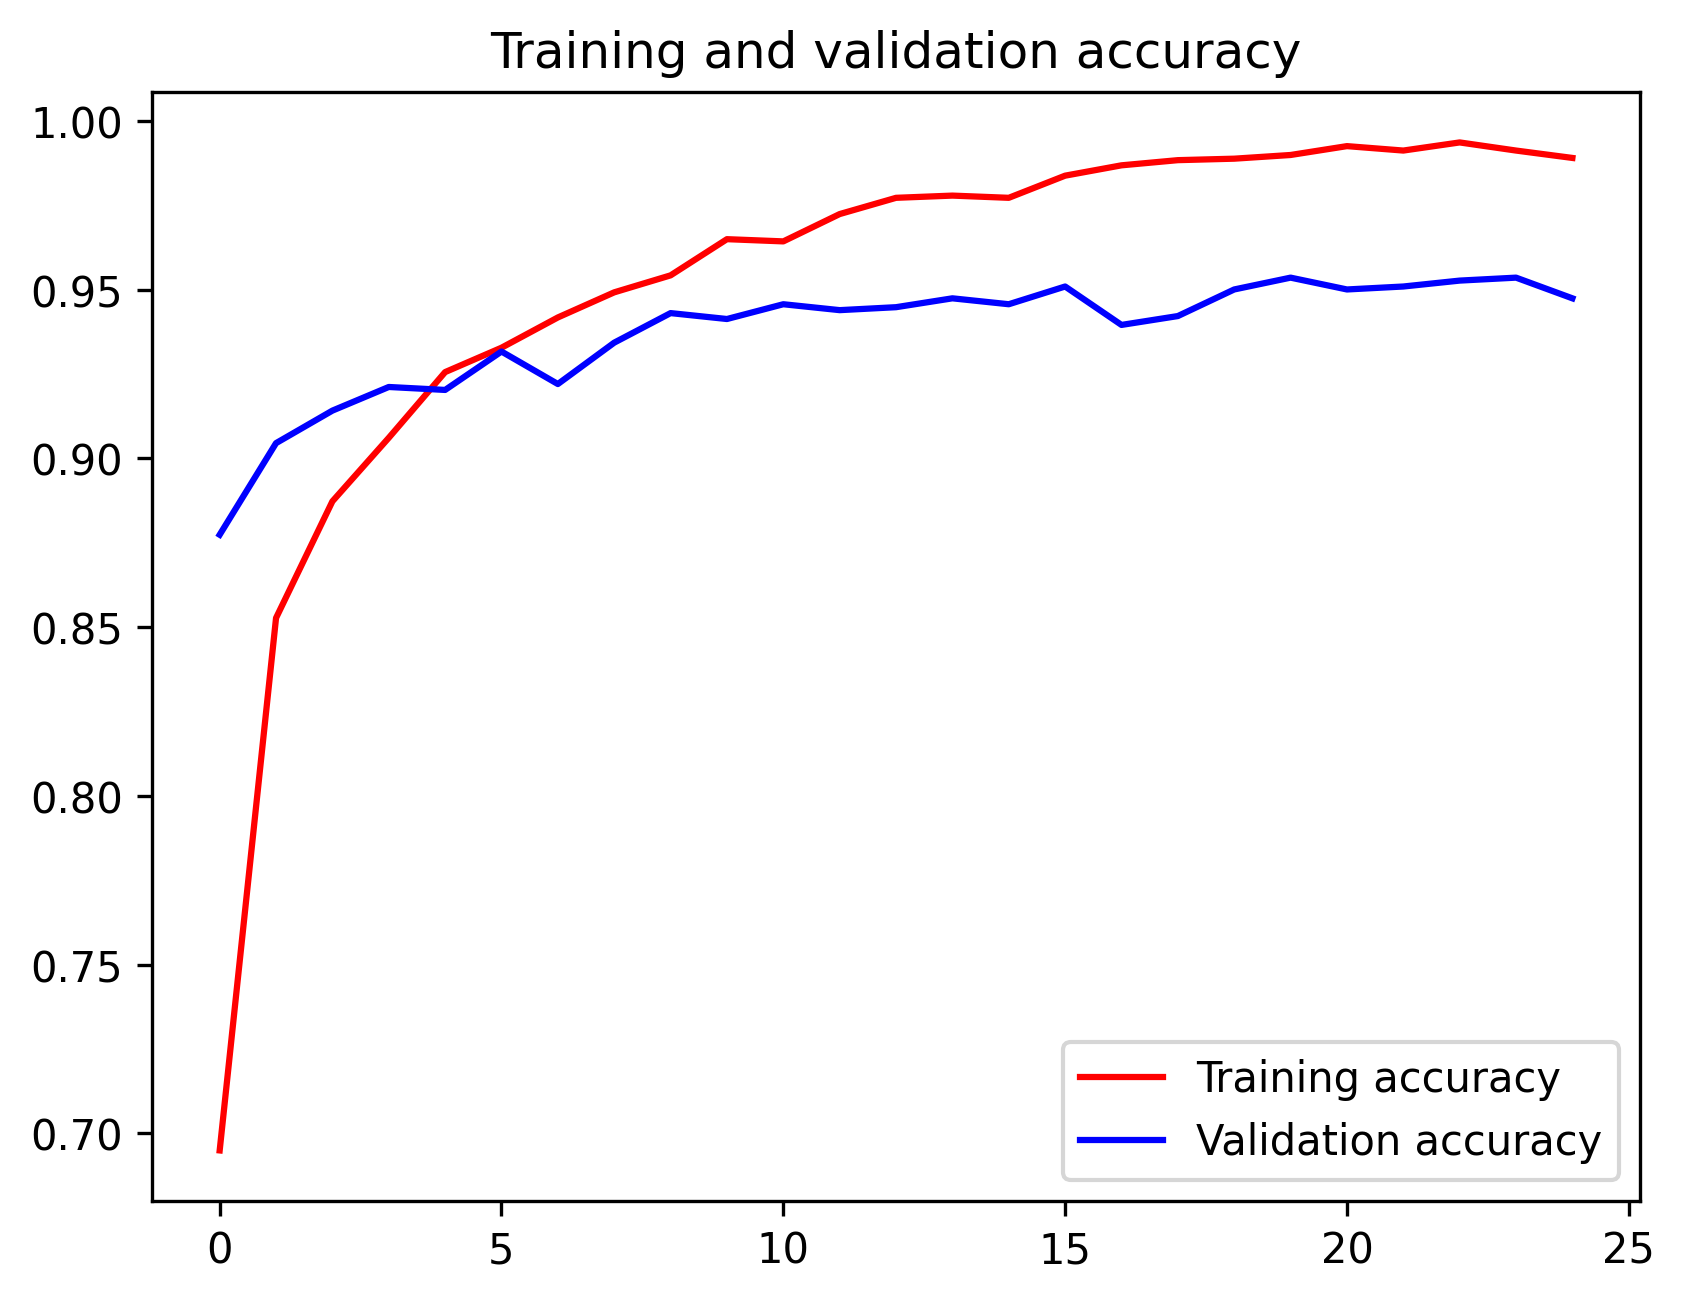

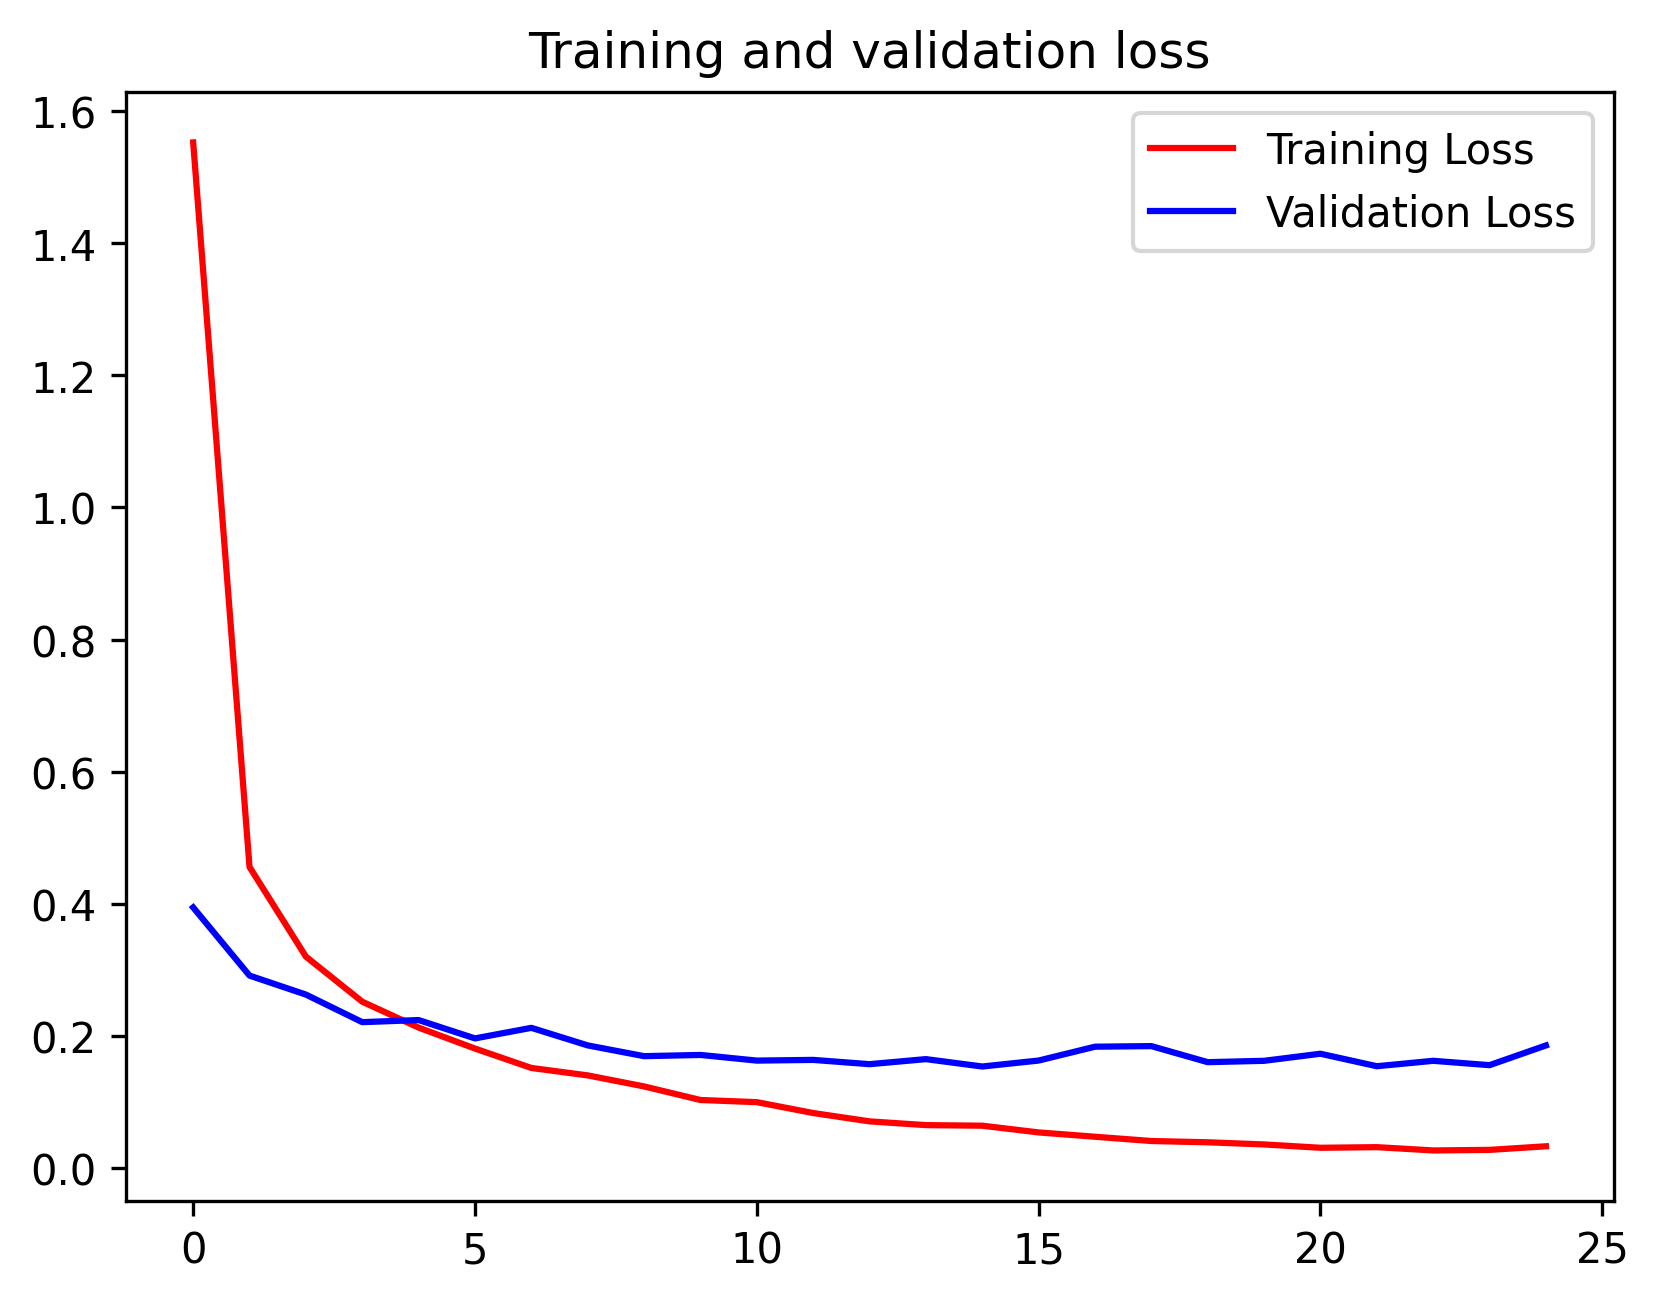

In [31]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 3. VGG19

In [32]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D

with tpu_strategy.scope():

    base_model3 = VGG19(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model3.layers[:10]:
        layer.trainable = False
    x = base_model3.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    predictions3 = Dense(4, activation='softmax')(x)
    model3 = Model(inputs=base_model3.inputs, outputs=predictions3)
    model3.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

80134624/80134624 [==============================] - 0s 0us/step


In [33]:
# model3.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [34]:
history3=model3.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model3.save('model3.h5')

Epoch 1/25


2024-06-03 16:29:19.260687: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:29:19.407946: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 7.6629 - accuracy: 0.2501

2024-06-03 16:29:51.172469: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:29:51.278562: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 48s 862ms/step - loss: 7.6629 - accuracy: 0.2501 - val_loss: 1.3860 - val_accuracy: 0.2583
Epoch 2/25
36/36 [==============================] - 4s 99ms/step - loss: 1.3820 - accuracy: 0.2707 - val_loss: 1.3879 - val_accuracy: 0.2566
Epoch 3/25
36/36 [==============================] - 3s 97ms/step - loss: 1.3856 - accuracy: 0.2516 - val_loss: 1.3859 - val_accuracy: 0.2811
Epoch 4/25
36/36 [==============================] - 3s 98ms/step - loss: 1.3841 - accuracy: 0.2788 - val_loss: 1.3849 - val_accuracy: 0.2811
Epoch 5/25
36/36 [==============================] - 3s 97ms/step - loss: 1.3838 - accuracy: 0.2788 - val_loss: 1.3847 - val_accuracy: 0.2811
Epoch 6/25
36/36 [==============================] - 3s 96ms/step - loss: 1.3836 - accuracy: 0.2788 - val_loss: 1.3845 - val_accuracy: 0.2811
Epoch 7/25
36/36 [==============================] - 3s 96ms/step - loss: 1.3837 - accuracy: 0.2788 - val_loss: 1.3843 - val_accuracy: 0.2811
Epoch 8/25
36/36 [====

In [35]:
vgg19_evaluation = model3.evaluate(val_ds)
vgg19_evaluation[1]*100

11/11 [==============================] - 8s 747ms/step - loss: 1.3809 - accuracy: 0.3089


30.892449617385864

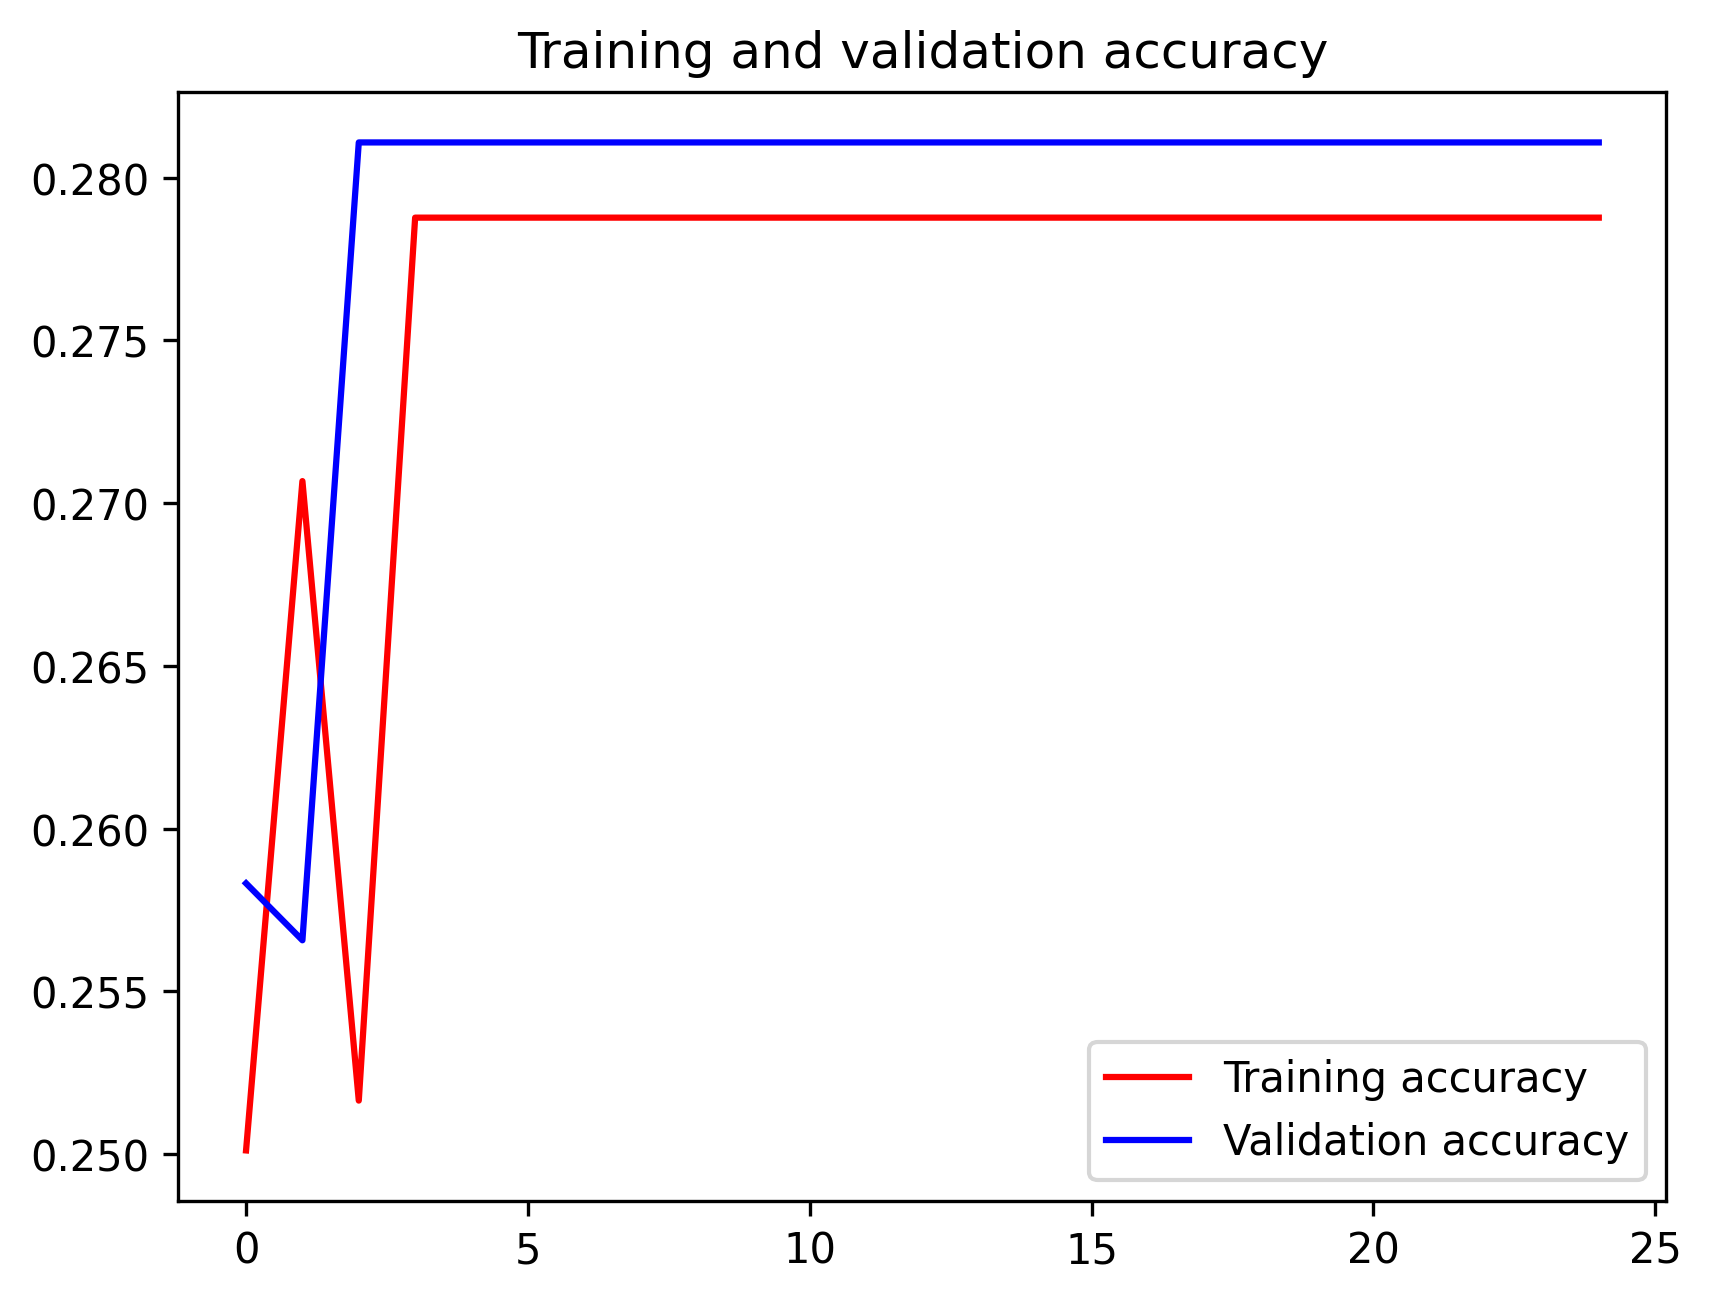

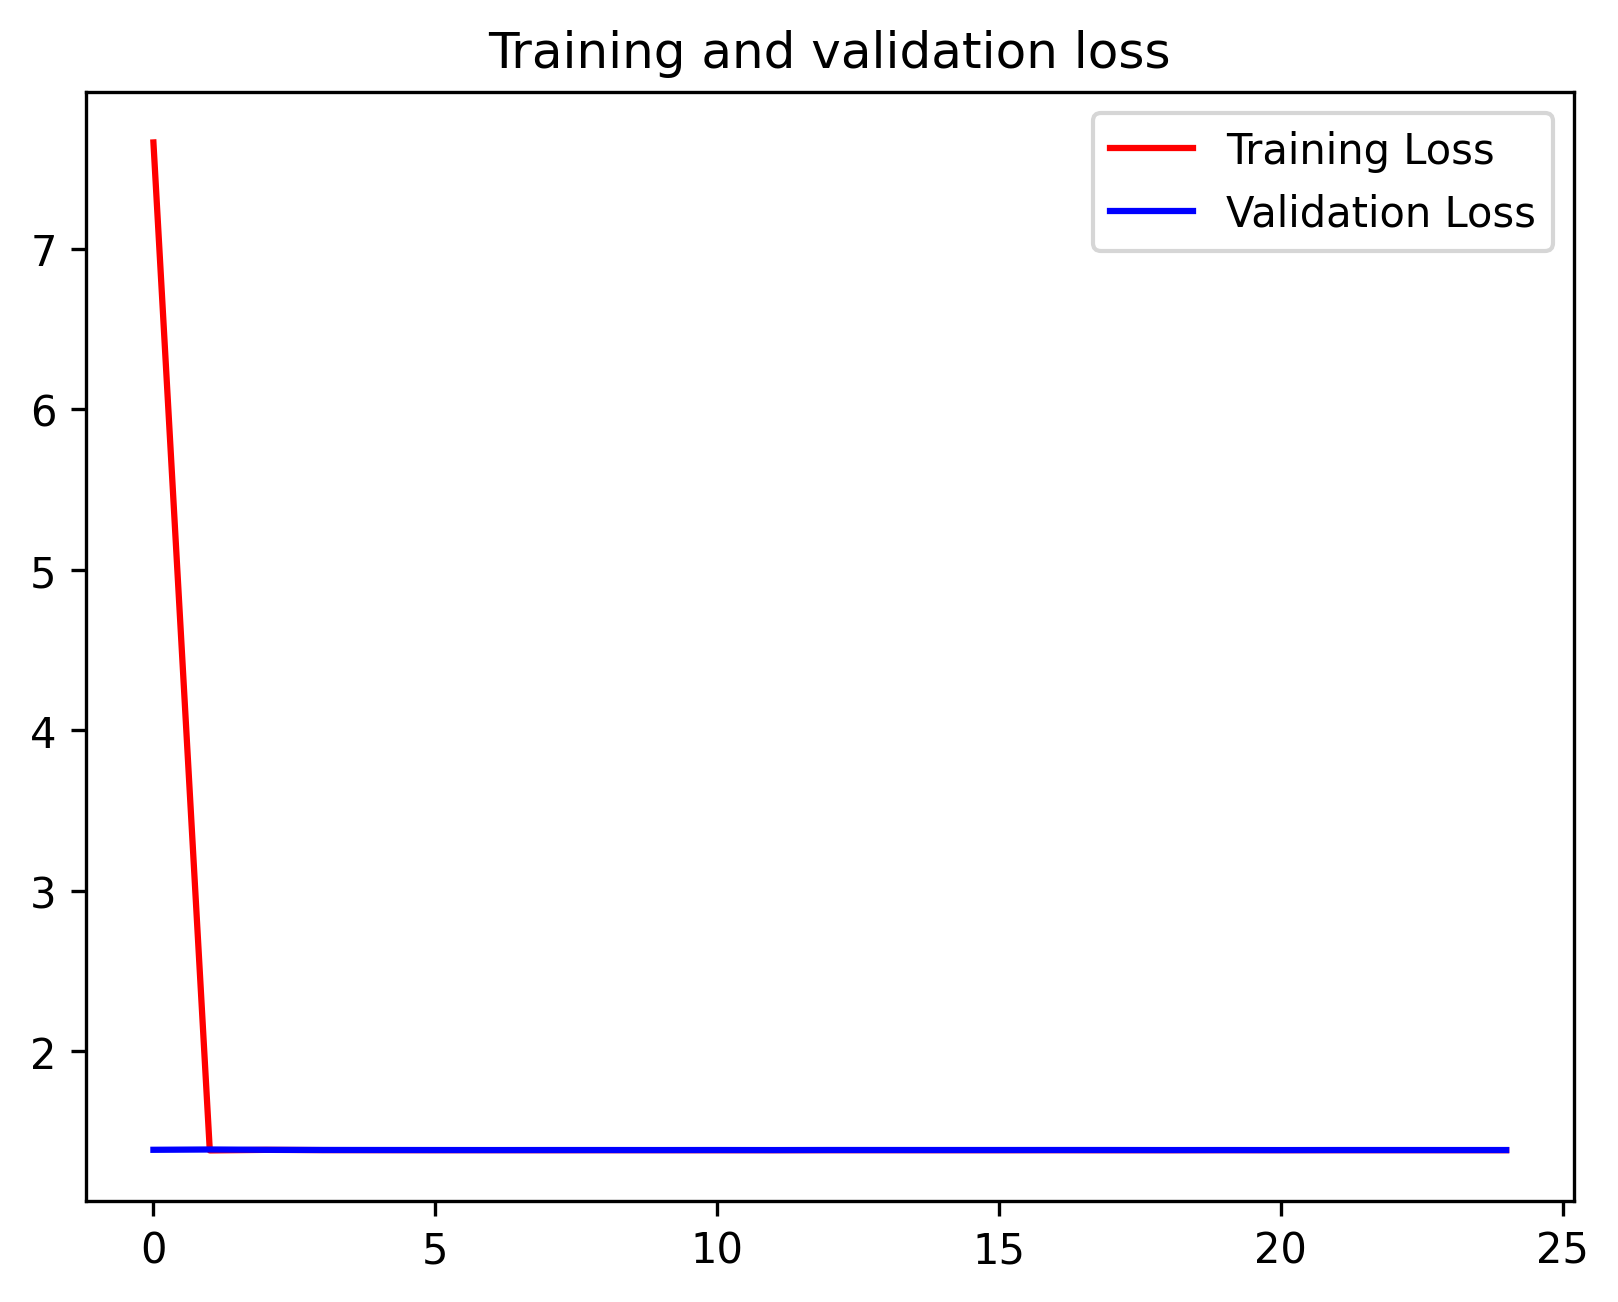

In [36]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 4. RESNET50

In [37]:
from tensorflow.keras.applications import ResNet50

with tpu_strategy.scope():

    base_model4 = ResNet50(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model4.layers[:10]:
        layer.trainable = False
    x = base_model4.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions4 = Dense(4, activation='softmax')(x)
    model4 = Model(inputs=base_model4.inputs, outputs=predictions4)
    model4.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [38]:
# model4.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [39]:
history4=model4.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model4.save('model4.h5')

Epoch 1/25


2024-06-03 16:32:29.351087: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:32:30.108816: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.5274 - accuracy: 0.8416

2024-06-03 16:33:37.406295: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:33:37.619626: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 105s 1s/step - loss: 0.5274 - accuracy: 0.8416 - val_loss: 1022.9586 - val_accuracy: 0.2601
Epoch 2/25
36/36 [==============================] - 5s 129ms/step - loss: 0.1441 - accuracy: 0.9503 - val_loss: 9.2097 - val_accuracy: 0.2285
Epoch 3/25
36/36 [==============================] - 4s 112ms/step - loss: 0.0741 - accuracy: 0.9764 - val_loss: 27.7069 - val_accuracy: 0.2776
Epoch 4/25
36/36 [==============================] - 4s 112ms/step - loss: 0.0559 - accuracy: 0.9814 - val_loss: 3.9375 - val_accuracy: 0.4308
Epoch 5/25
36/36 [==============================] - 4s 110ms/step - loss: 0.0683 - accuracy: 0.9777 - val_loss: 299.1662 - val_accuracy: 0.2601
Epoch 6/25
36/36 [==============================] - 4s 111ms/step - loss: 0.0395 - accuracy: 0.9858 - val_loss: 4.0214 - val_accuracy: 0.6489
Epoch 7/25
36/36 [==============================] - 4s 112ms/step - loss: 0.0296 - accuracy: 0.9917 - val_loss: 0.1476 - val_accuracy: 0.9518
Epoch 8/25
3

In [40]:
resnet50_evaluation = model4.evaluate(val_ds)
resnet50_evaluation[1]*100

11/11 [==============================] - 10s 875ms/step - loss: 0.0728 - accuracy: 0.9847


98.47444891929626

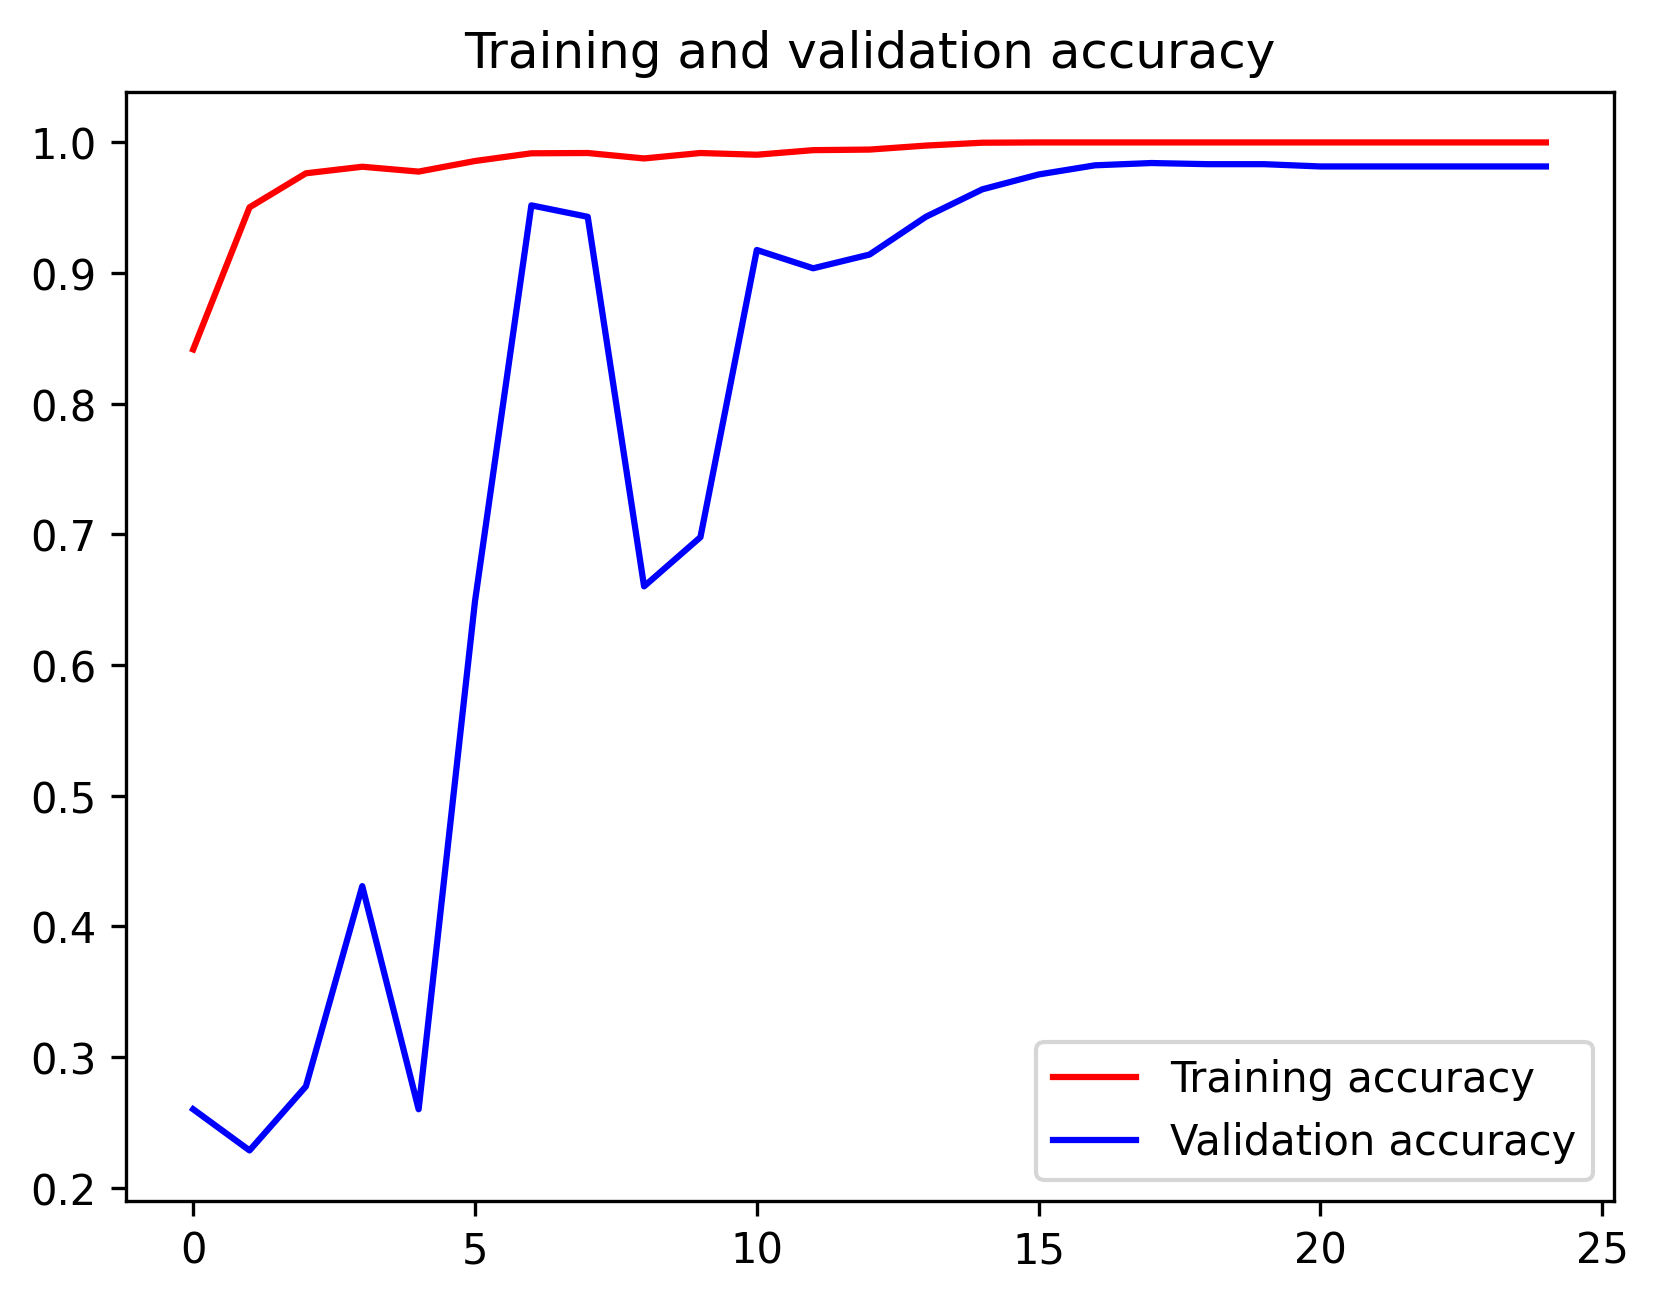

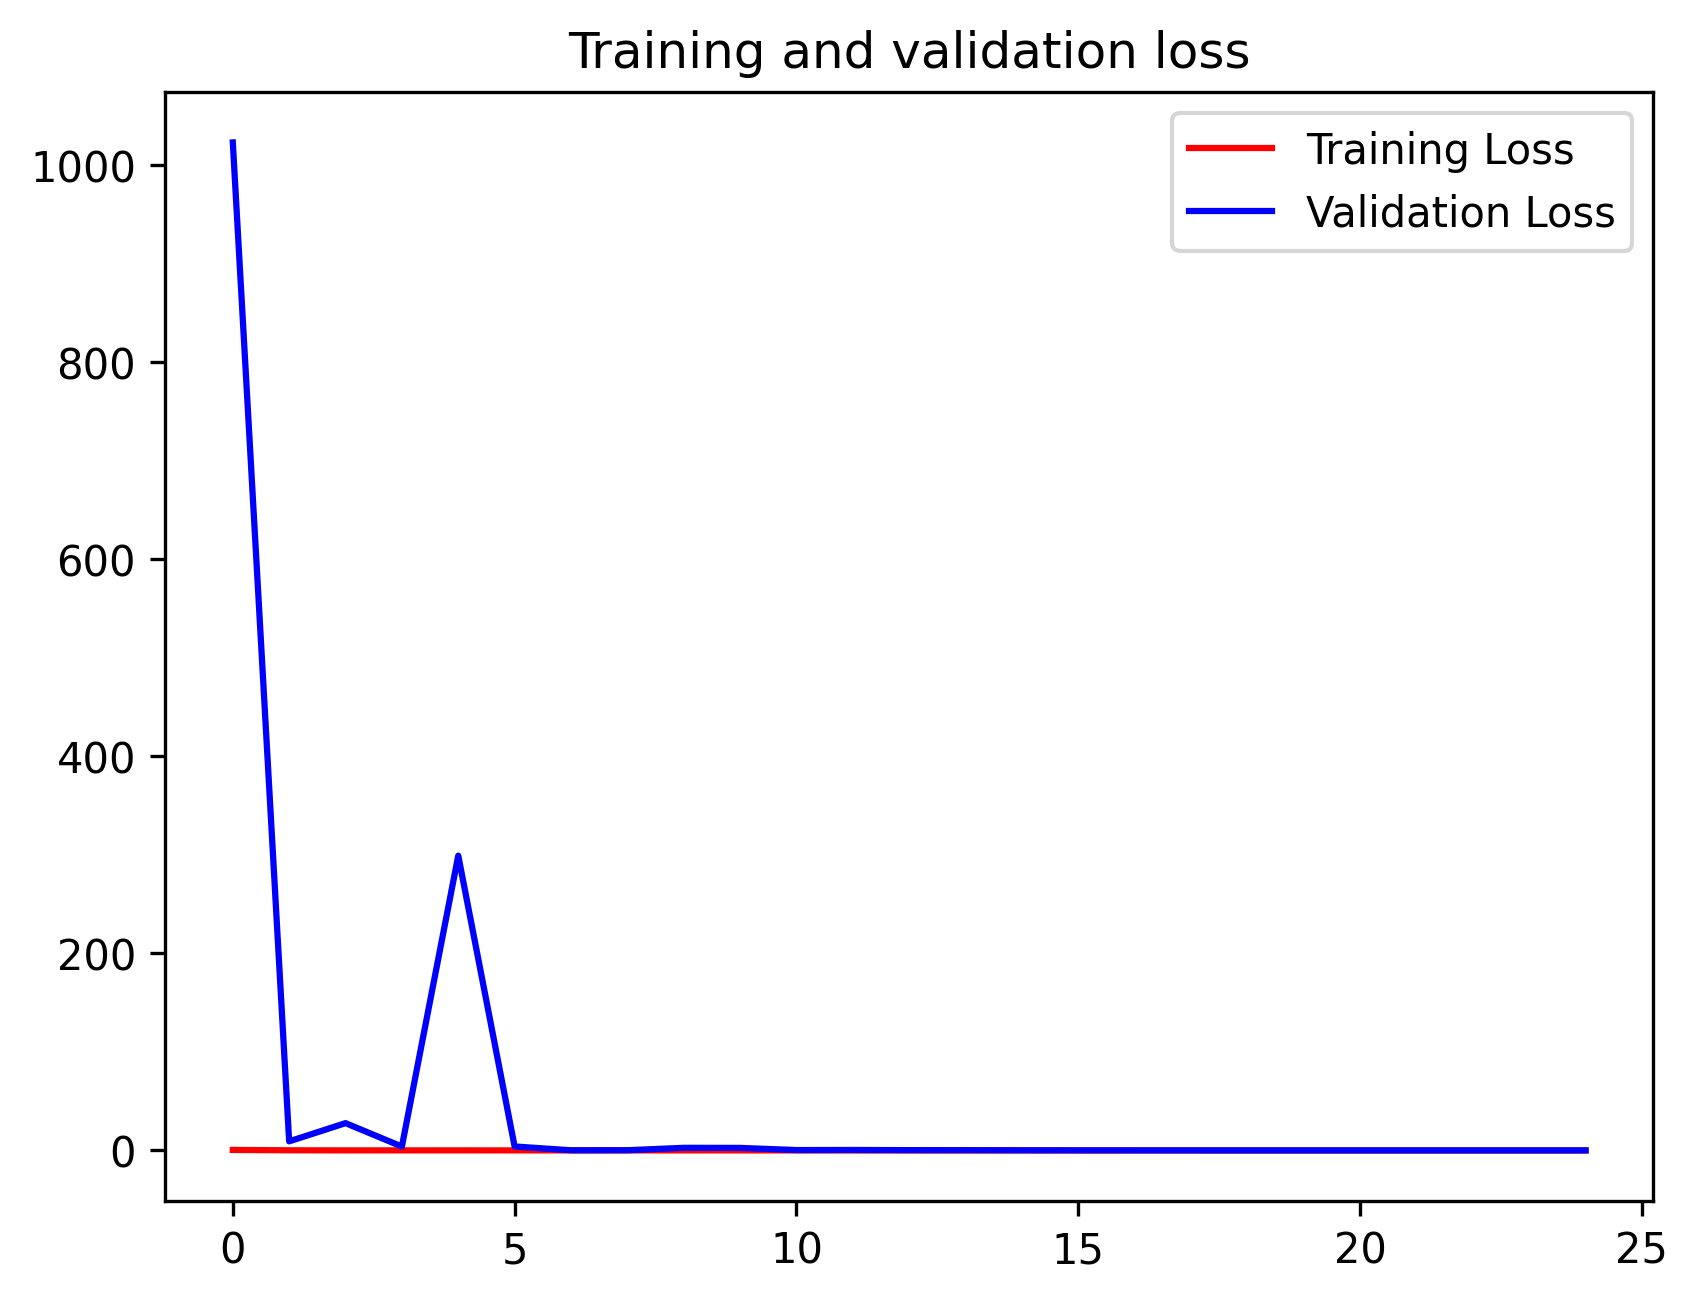

In [41]:
import matplotlib.pyplot as plt
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## to write

### 5. Inception-ResNet-v2

In [42]:
with tpu_strategy.scope():

    base_model5 = tf.keras.applications.InceptionResNetV2(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model5.layers[:10]:
        layer.trainable = False
    x = base_model5.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions5 = Dense(4, activation='softmax')(x)
    model5 = Model(inputs=base_model5.inputs, outputs=predictions5)
    model5.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

219055592/219055592 [==============================] - 3s 0us/step


In [43]:
# model5.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [44]:
history5=model5.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model5.save('model5.h5')

Epoch 1/25


2024-06-03 16:37:38.093901: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:37:40.233929: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.4543 - accuracy: 0.8368

2024-06-03 16:40:54.788299: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:40:55.260680: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 290s 4s/step - loss: 0.4543 - accuracy: 0.8368 - val_loss: 115.3732 - val_accuracy: 0.1594
Epoch 2/25
36/36 [==============================] - 7s 185ms/step - loss: 0.1258 - accuracy: 0.9593 - val_loss: 22.2397 - val_accuracy: 0.2539
Epoch 3/25
36/36 [==============================] - 7s 185ms/step - loss: 0.0615 - accuracy: 0.9790 - val_loss: 0.3409 - val_accuracy: 0.8967
Epoch 4/25
36/36 [==============================] - 7s 184ms/step - loss: 0.0647 - accuracy: 0.9788 - val_loss: 0.3593 - val_accuracy: 0.9081
Epoch 5/25
36/36 [==============================] - 7s 182ms/step - loss: 0.0352 - accuracy: 0.9904 - val_loss: 1.8393 - val_accuracy: 0.6200
Epoch 6/25
36/36 [==============================] - 7s 184ms/step - loss: 0.0343 - accuracy: 0.9902 - val_loss: 0.1654 - val_accuracy: 0.9466
Epoch 7/25
36/36 [==============================] - 7s 183ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.5689 - val_accuracy: 0.8687
Epoch 8/25
36/3

In [45]:
inceptionresnetv2_evaluation = model5.evaluate(val_ds)
inceptionresnetv2_evaluation[1]*100

11/11 [==============================] - 15s 1s/step - loss: 0.0375 - accuracy: 0.9908


99.08466935157776

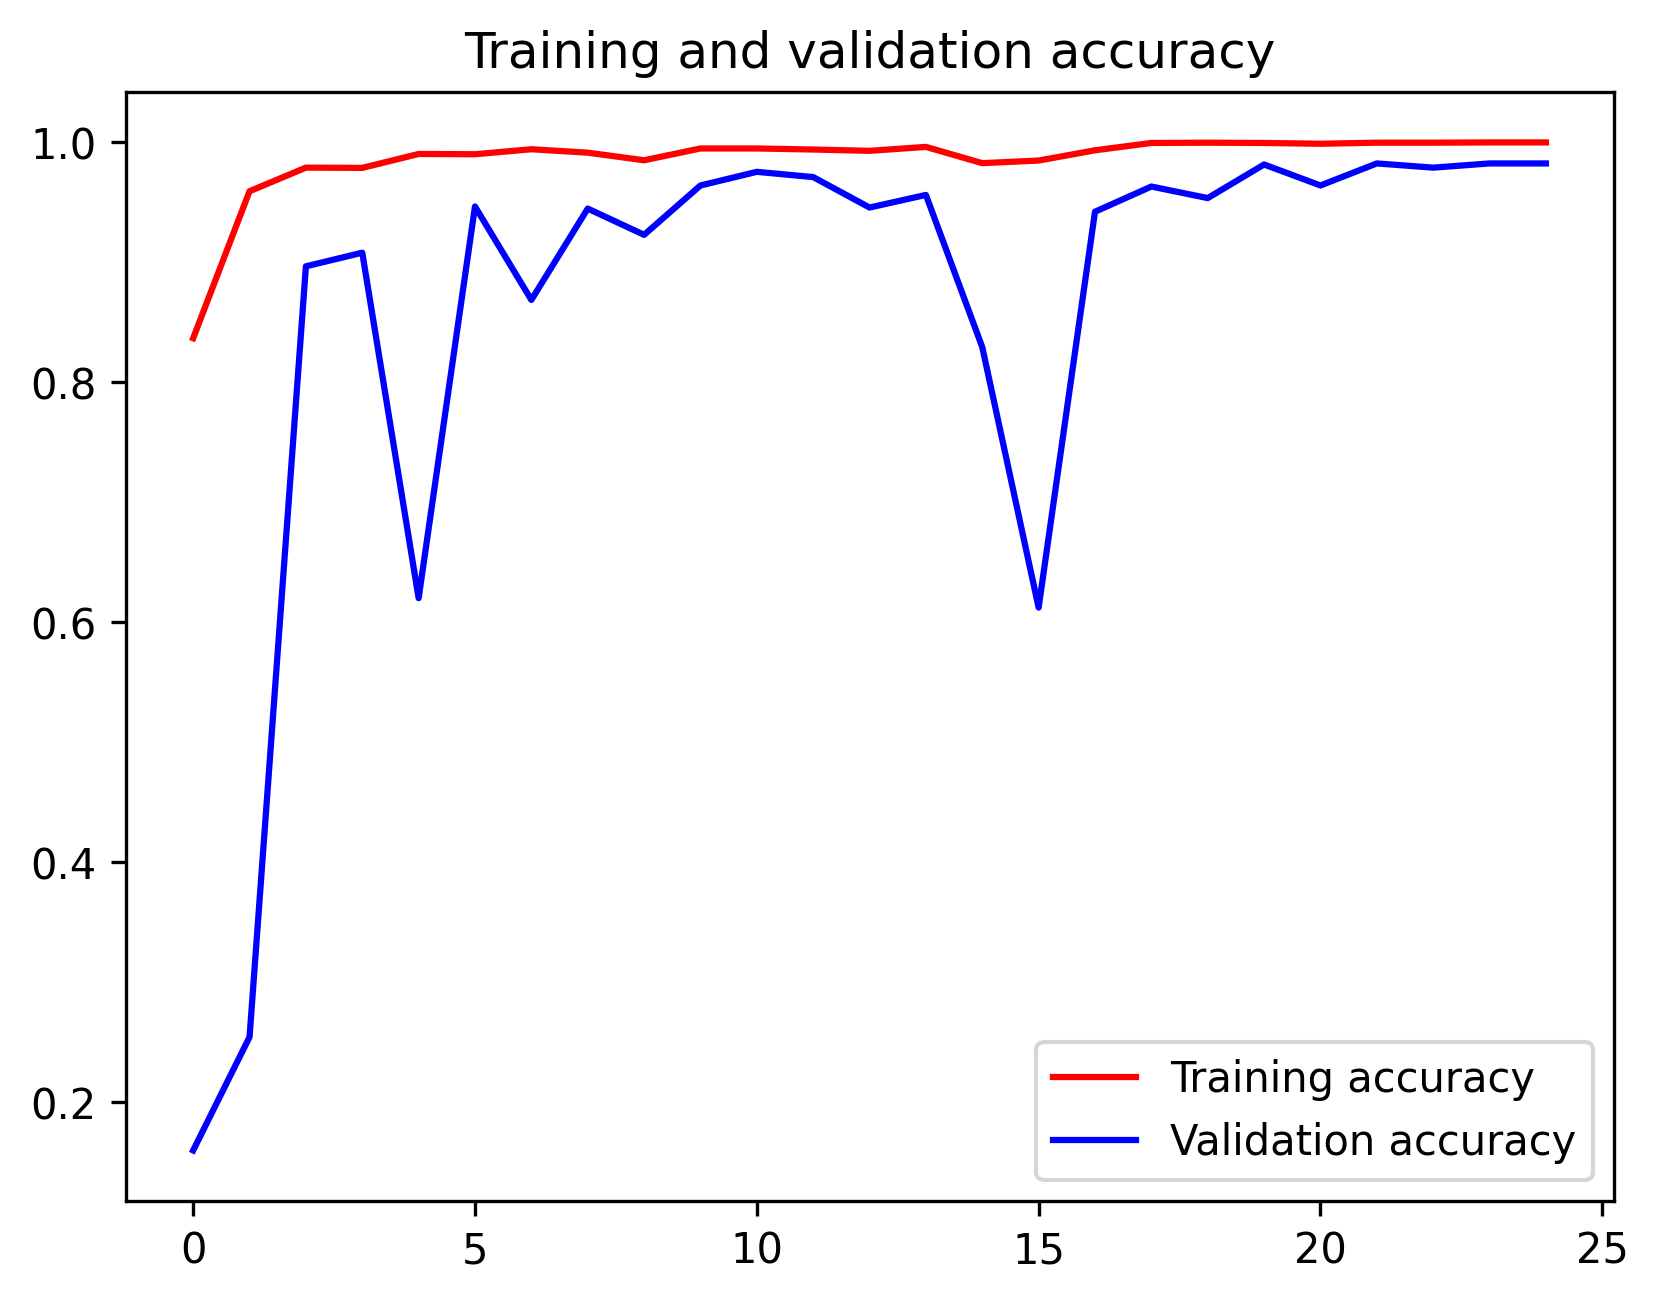

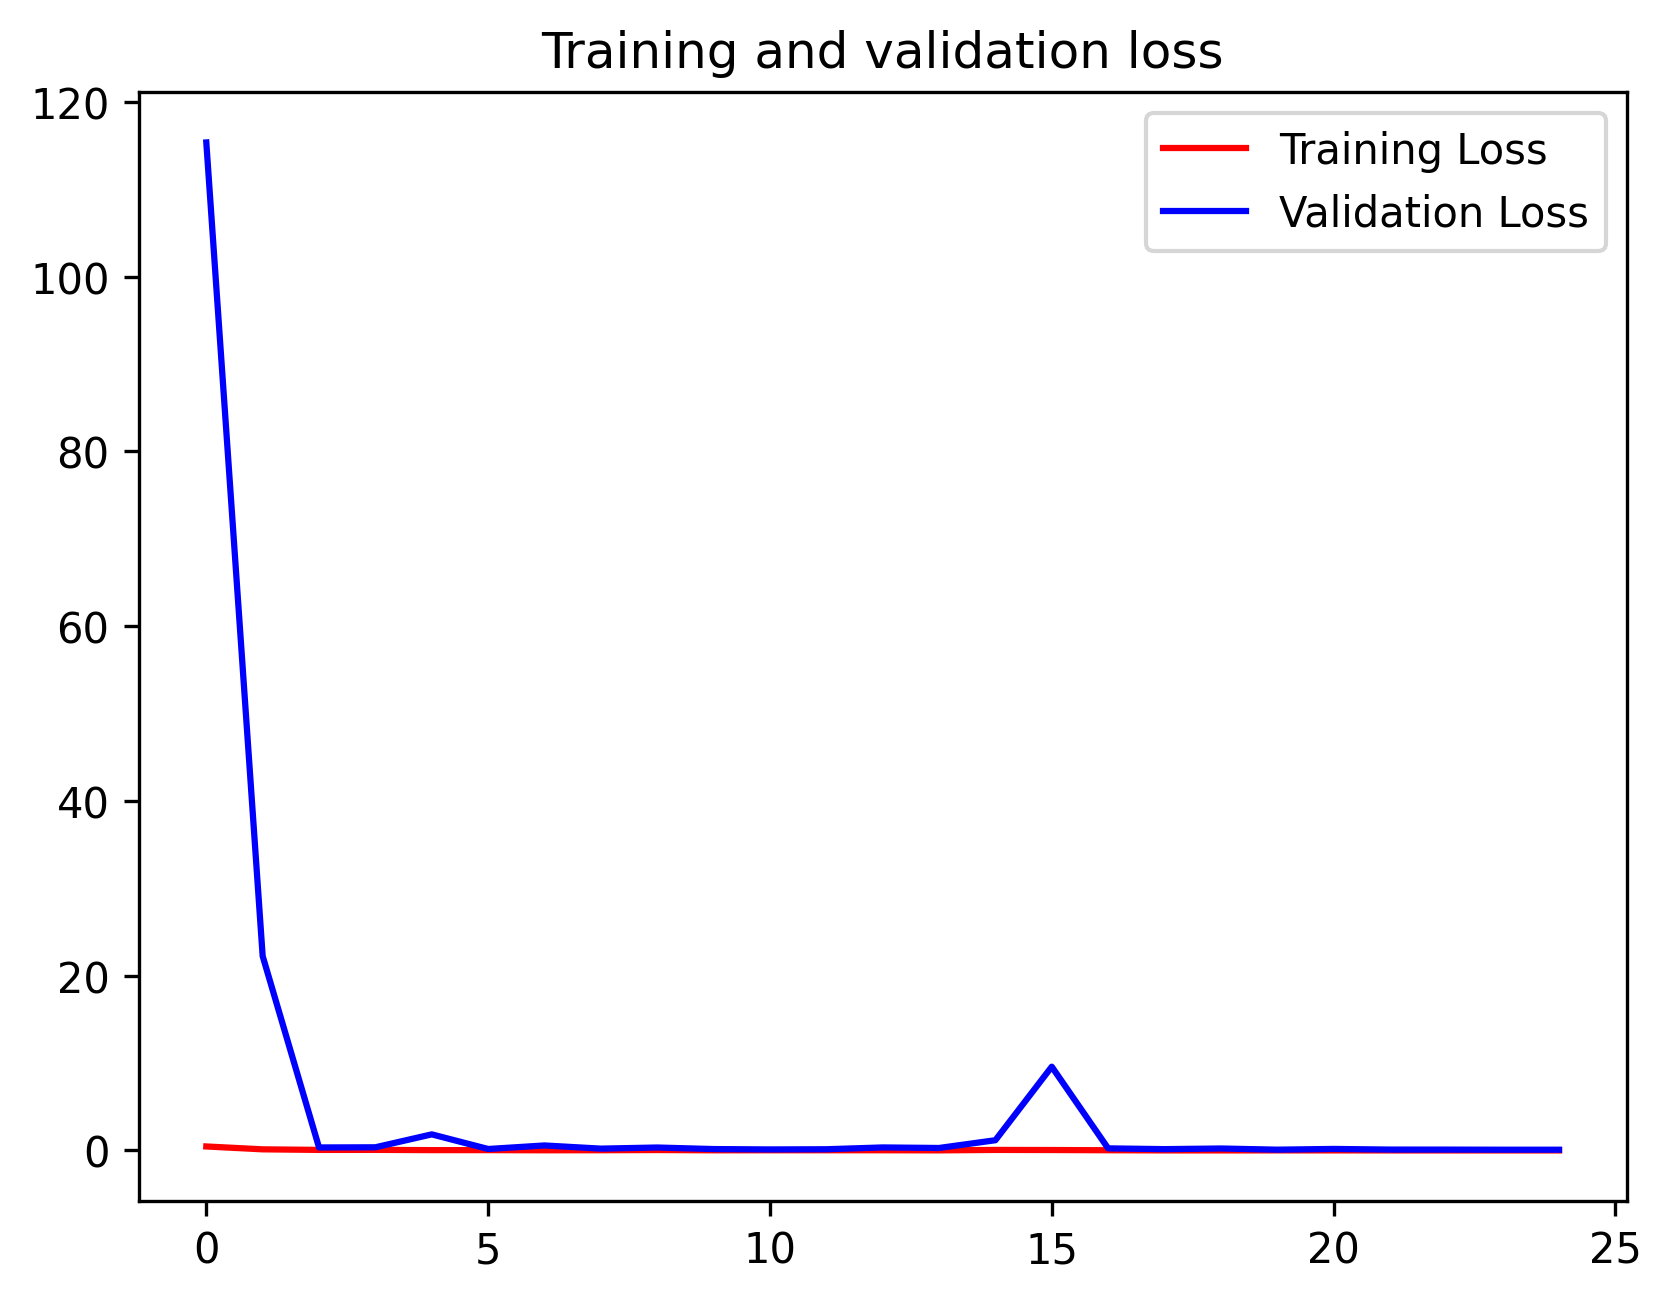

In [46]:
import matplotlib.pyplot as plt
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 6. DenseNet-201

In [47]:
with tpu_strategy.scope():

    base_model6 = tf.keras.applications.DenseNet201(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model6.layers[:10]:
        layer.trainable = False
    x = base_model6.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions6 = Dense(4, activation='softmax')(x)
    model6 = Model(inputs=base_model6.inputs, outputs=predictions6)
    model6.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

74836368/74836368 [==============================] - 0s 0us/step


In [48]:
# model6.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [49]:
history6=model6.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model6.save('model6.h5')

Epoch 1/25


2024-06-03 16:46:45.767883: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:46:48.240061: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.3906 - accuracy: 0.8608

2024-06-03 16:50:31.883059: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:50:32.386014: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 339s 4s/step - loss: 0.3906 - accuracy: 0.8608 - val_loss: 56.4323 - val_accuracy: 0.2609
Epoch 2/25
36/36 [==============================] - 8s 212ms/step - loss: 0.1585 - accuracy: 0.9495 - val_loss: 2.3257 - val_accuracy: 0.7084
Epoch 3/25
36/36 [==============================] - 8s 214ms/step - loss: 0.0844 - accuracy: 0.9696 - val_loss: 5.1878 - val_accuracy: 0.6524
Epoch 4/25
36/36 [==============================] - 8s 212ms/step - loss: 0.0627 - accuracy: 0.9810 - val_loss: 2.7650 - val_accuracy: 0.7469
Epoch 5/25
36/36 [==============================] - 8s 212ms/step - loss: 0.0697 - accuracy: 0.9757 - val_loss: 1.0522 - val_accuracy: 0.8520
Epoch 6/25
36/36 [==============================] - 8s 214ms/step - loss: 0.0527 - accuracy: 0.9816 - val_loss: 0.9114 - val_accuracy: 0.8091
Epoch 7/25
36/36 [==============================] - 8s 211ms/step - loss: 0.0242 - accuracy: 0.9908 - val_loss: 0.3029 - val_accuracy: 0.9440
Epoch 8/25
36/36 

In [50]:
densenet201_evaluation = model6.evaluate(val_ds)
densenet201_evaluation[1]*100

11/11 [==============================] - 26s 2s/step - loss: 0.2898 - accuracy: 0.9512


95.11823058128357

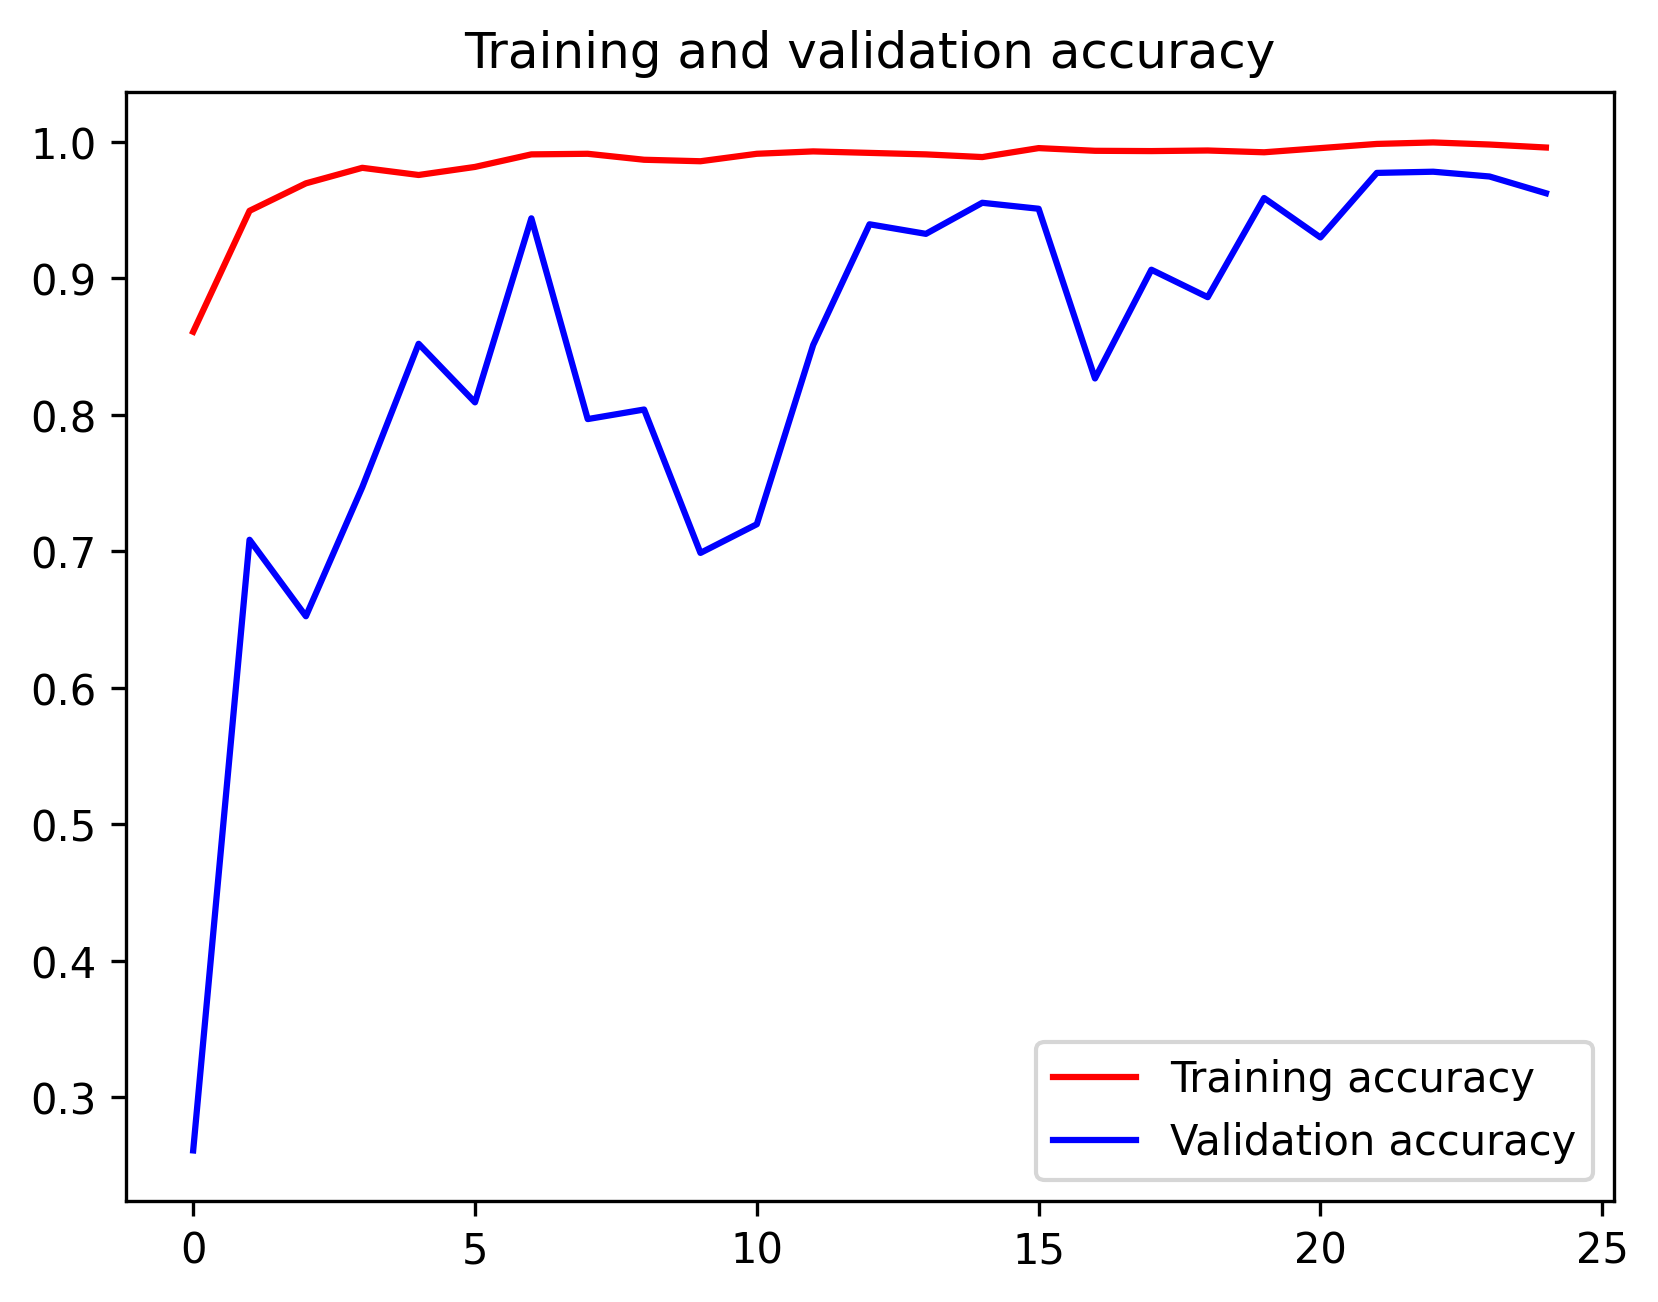

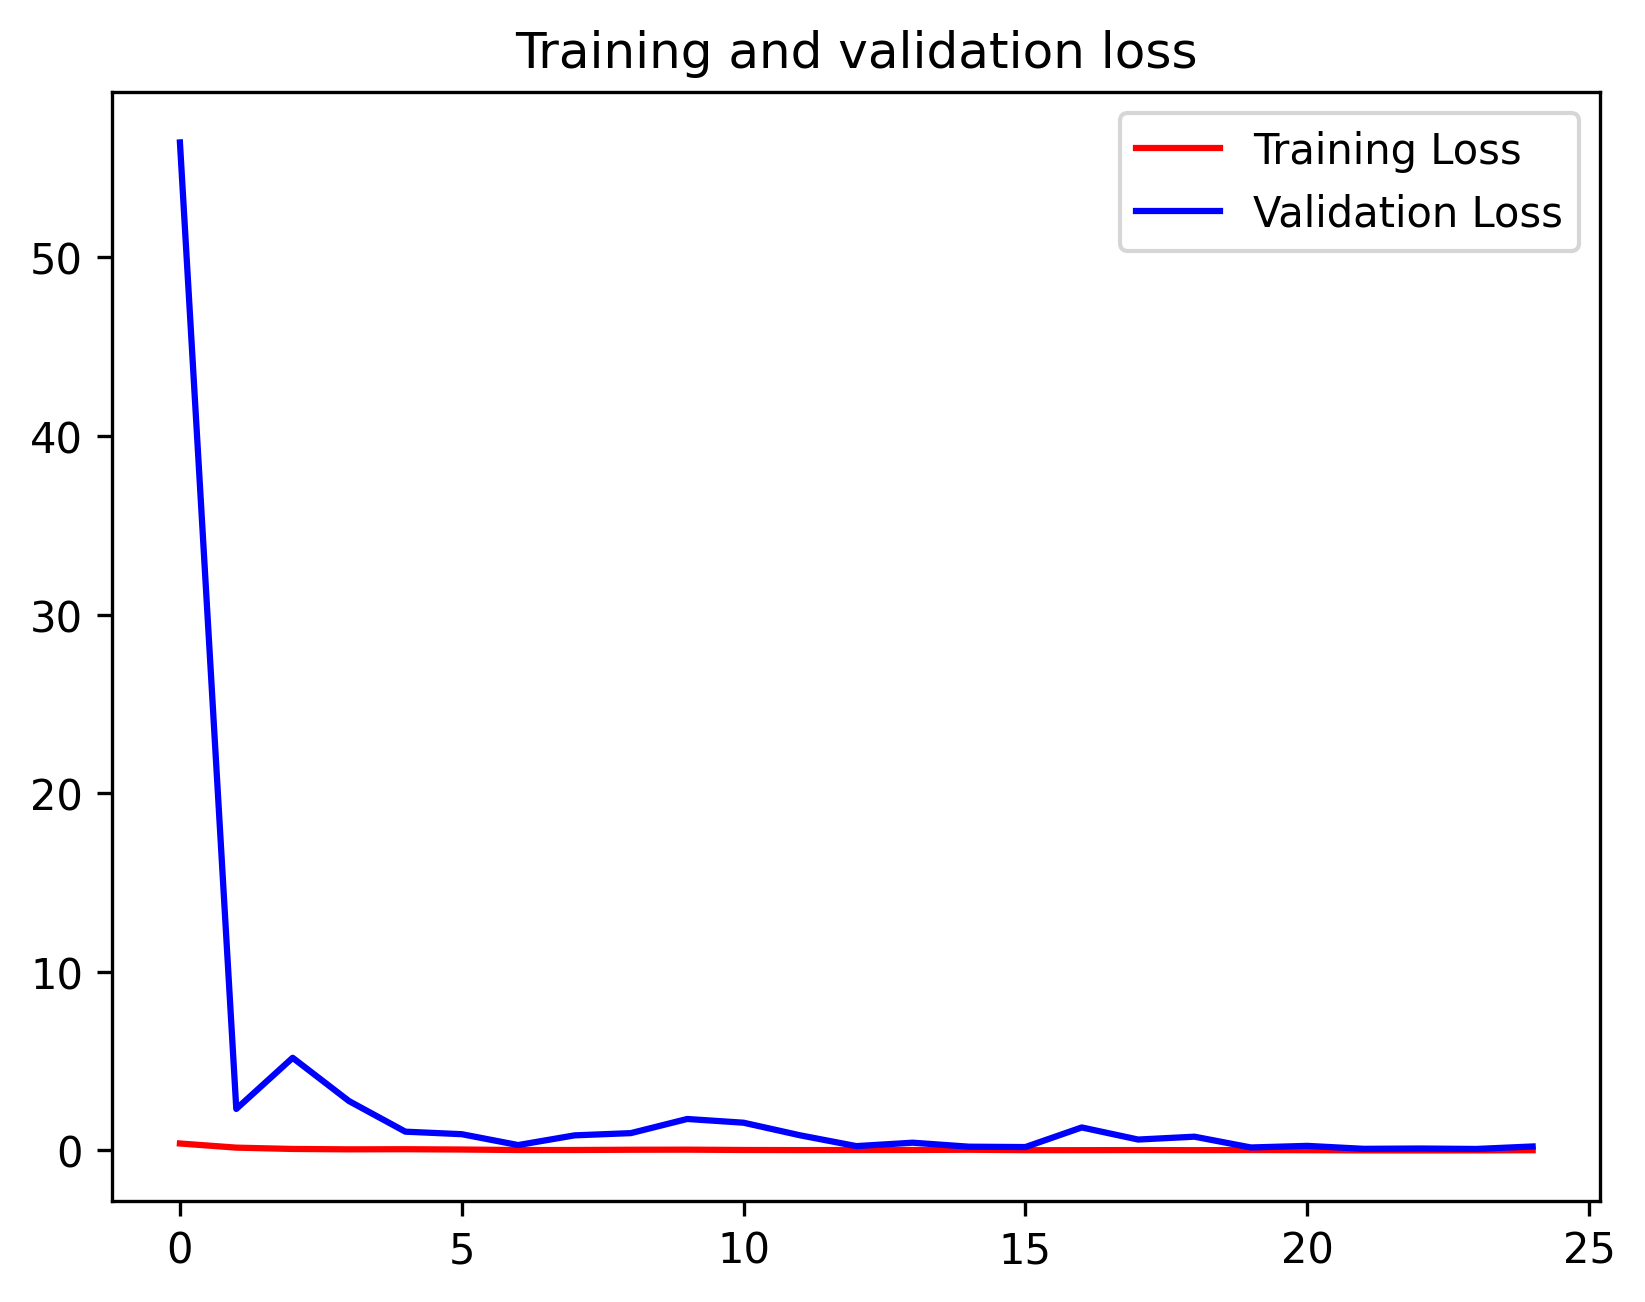

In [51]:
import matplotlib.pyplot as plt
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### AlexNet

### 7. ResNet-101

In [52]:
with tpu_strategy.scope():

    base_model7 = tf.keras.applications.ResNet101(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model7.layers[:10]:
        layer.trainable = False
    x = base_model7.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions7 = Dense(4, activation='softmax')(x)
    model7 = Model(inputs=base_model7.inputs, outputs=predictions7)
    model7.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

171446536/171446536 [==============================] - 1s 0us/step


In [53]:
# model7.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [54]:
history7=model7.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model7.save('model7.h5')

Epoch 1/25


2024-06-03 16:56:10.148093: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:56:11.767246: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.6999 - accuracy: 0.7976

2024-06-03 16:58:12.682112: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 16:58:13.013535: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 186s 2s/step - loss: 0.6999 - accuracy: 0.7976 - val_loss: 87471024.0000 - val_accuracy: 0.2601
Epoch 2/25
36/36 [==============================] - 5s 153ms/step - loss: 0.2408 - accuracy: 0.9127 - val_loss: 11304.8643 - val_accuracy: 0.2811
Epoch 3/25
36/36 [==============================] - 6s 159ms/step - loss: 0.1142 - accuracy: 0.9621 - val_loss: 102.8540 - val_accuracy: 0.2820
Epoch 4/25
36/36 [==============================] - 6s 157ms/step - loss: 0.0766 - accuracy: 0.9751 - val_loss: 2.1759 - val_accuracy: 0.6313
Epoch 5/25
36/36 [==============================] - 6s 156ms/step - loss: 0.0540 - accuracy: 0.9816 - val_loss: 0.9310 - val_accuracy: 0.7942
Epoch 6/25
36/36 [==============================] - 6s 157ms/step - loss: 0.1021 - accuracy: 0.9661 - val_loss: 0.5845 - val_accuracy: 0.8634
Epoch 7/25
36/36 [==============================] - 6s 157ms/step - loss: 0.0790 - accuracy: 0.9731 - val_loss: 1.7062 - val_accuracy: 0.7040
Epoch

In [55]:
resnet101_evaluation = model7.evaluate(val_ds)
resnet101_evaluation[1]*100

11/11 [==============================] - 11s 1s/step - loss: 4.2777 - accuracy: 0.6087


60.86956262588501

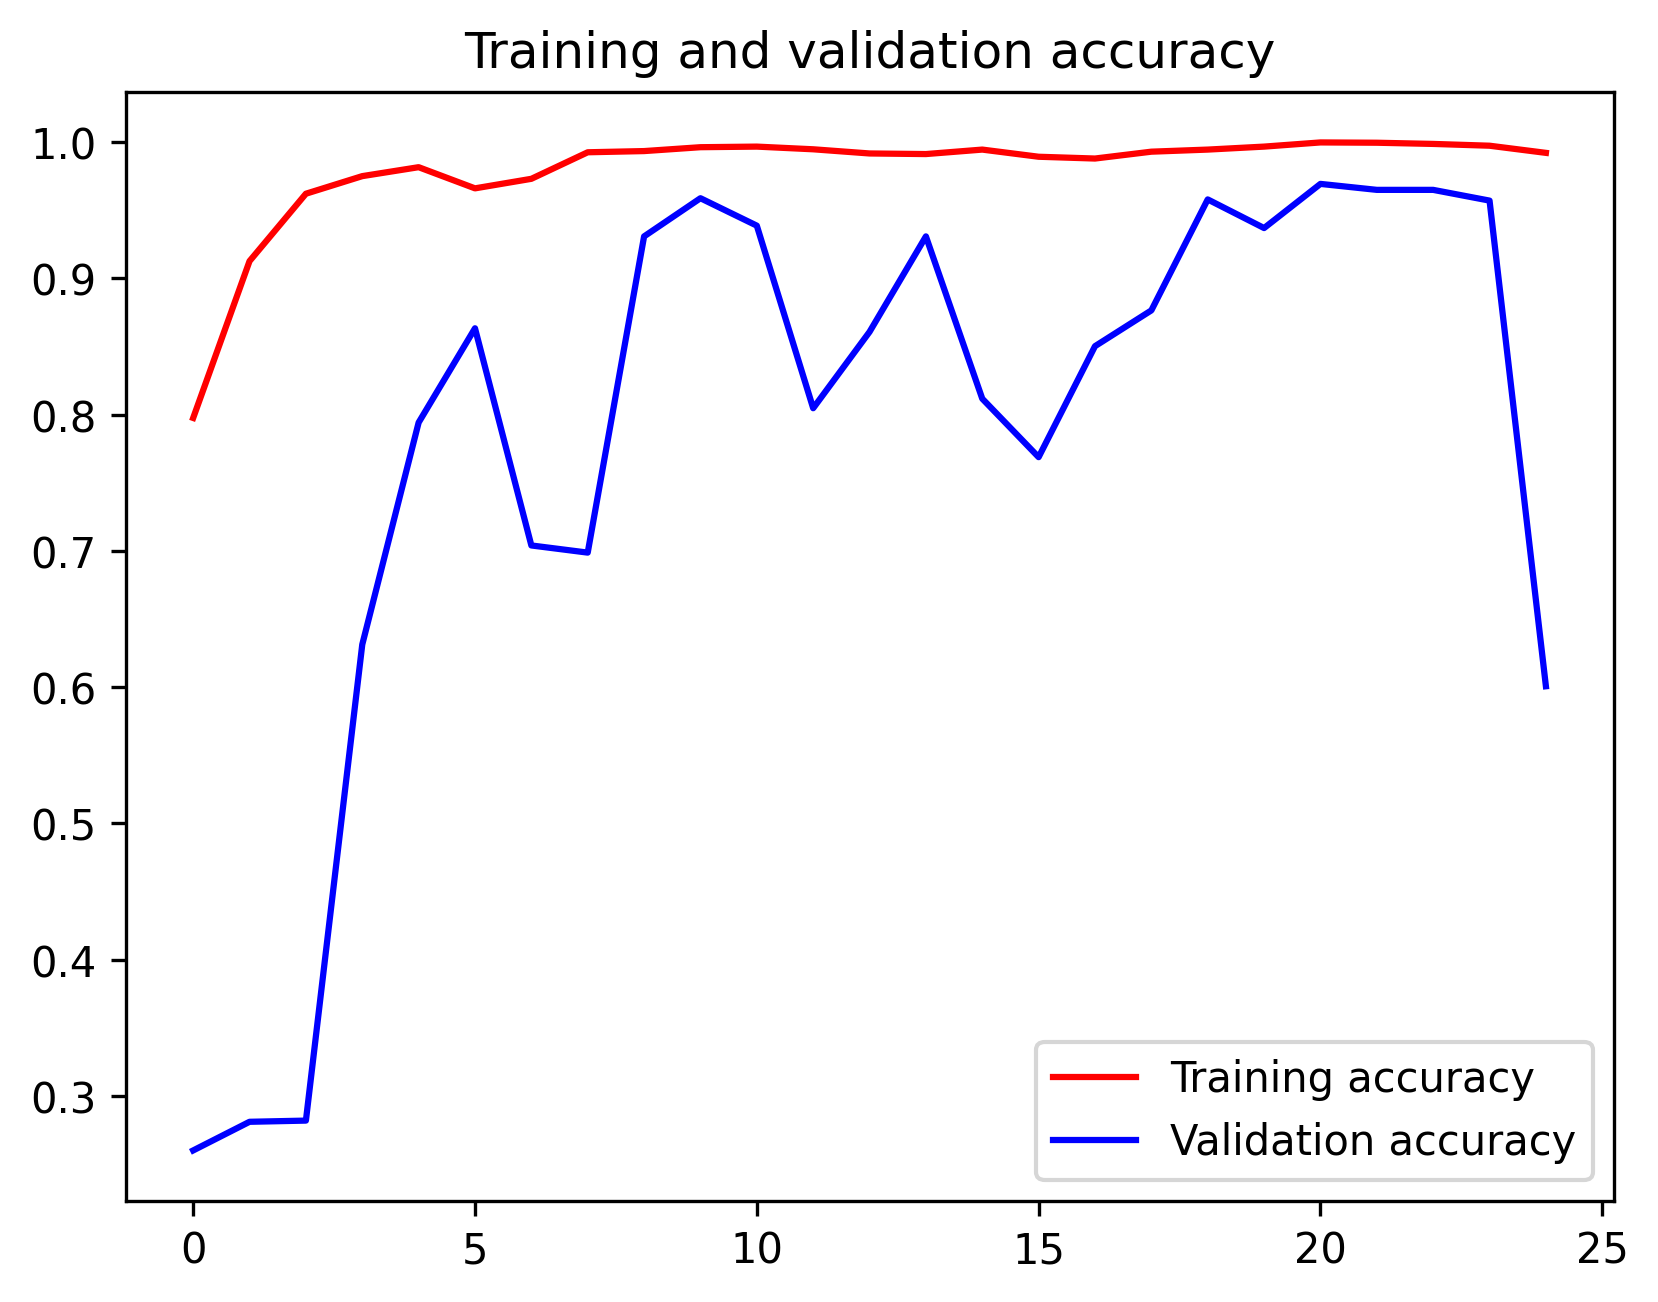

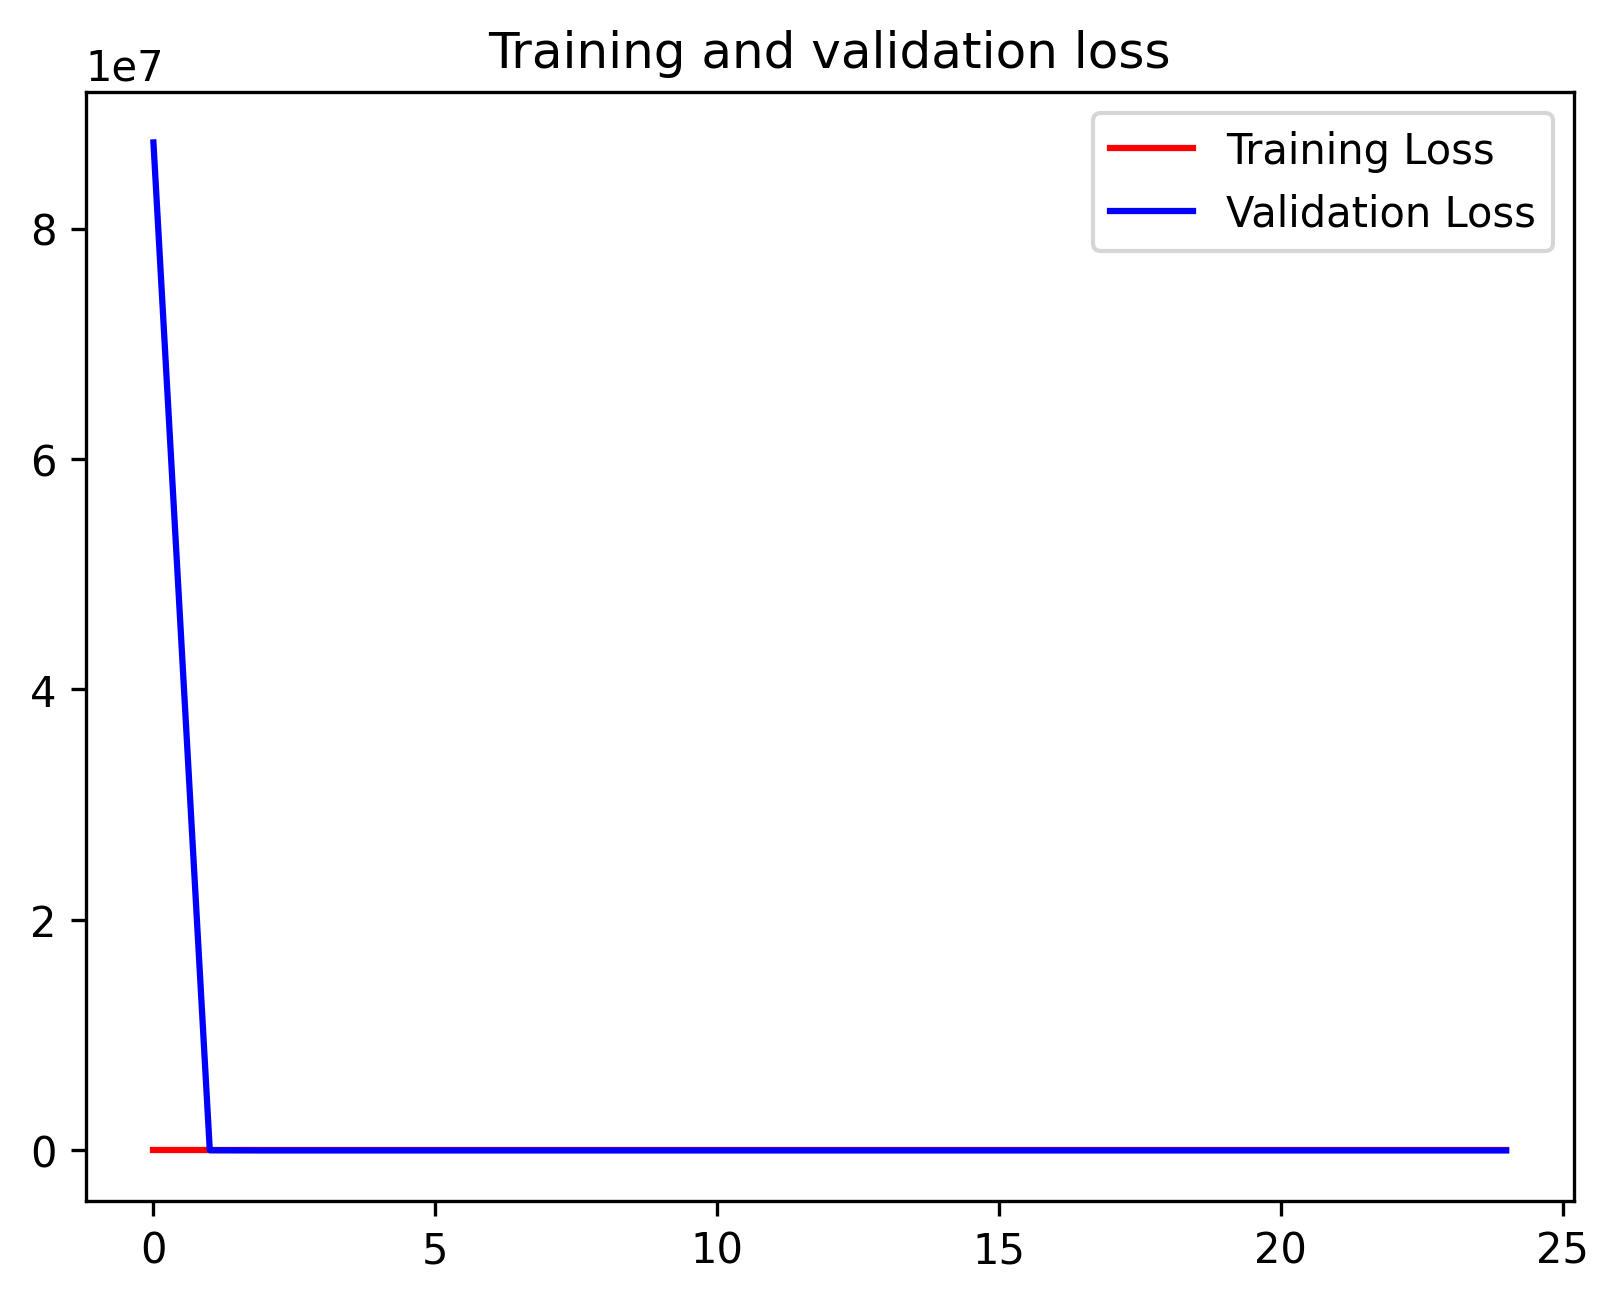

In [56]:
import matplotlib.pyplot as plt
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']
loss = history7.history['loss']
val_loss = history7.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Mask R-CNN

### 8. MobileNet

In [57]:
with tpu_strategy.scope():

    base_model8 = tf.keras.applications.MobileNet(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model8.layers[:10]:
        layer.trainable = False
    x = base_model8.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions8 = Dense(4, activation='softmax')(x)
    model8 = Model(inputs=base_model8.inputs, outputs=predictions8)
    model8.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

17225924/17225924 [==============================] - 0s 0us/step


In [58]:
# model8.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [59]:
history8=model8.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model8.save('model8.h5')

Epoch 1/25


2024-06-03 17:01:32.519864: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:01:33.015441: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.4871 - accuracy: 0.8309

2024-06-03 17:02:05.784148: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:02:05.945569: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 56s 764ms/step - loss: 0.4871 - accuracy: 0.8309 - val_loss: 1.7254 - val_accuracy: 0.5683
Epoch 2/25
36/36 [==============================] - 3s 72ms/step - loss: 0.1373 - accuracy: 0.9523 - val_loss: 1.6580 - val_accuracy: 0.7268
Epoch 3/25
36/36 [==============================] - 3s 75ms/step - loss: 0.0708 - accuracy: 0.9757 - val_loss: 1.0851 - val_accuracy: 0.7890
Epoch 4/25
36/36 [==============================] - 3s 72ms/step - loss: 0.0879 - accuracy: 0.9687 - val_loss: 0.5340 - val_accuracy: 0.8984
Epoch 5/25
36/36 [==============================] - 3s 74ms/step - loss: 0.0391 - accuracy: 0.9853 - val_loss: 1.3382 - val_accuracy: 0.7872
Epoch 6/25
36/36 [==============================] - 3s 72ms/step - loss: 0.0541 - accuracy: 0.9818 - val_loss: 1.6328 - val_accuracy: 0.7942
Epoch 7/25
36/36 [==============================] - 3s 72ms/step - loss: 0.0253 - accuracy: 0.9910 - val_loss: 0.5447 - val_accuracy: 0.8818
Epoch 8/25
36/36 [====

In [60]:
mobilenet_evaluation = model8.evaluate(val_ds)
mobilenet_evaluation[1]*100

11/11 [==============================] - 5s 422ms/step - loss: 0.2982 - accuracy: 0.9344


93.44012141227722

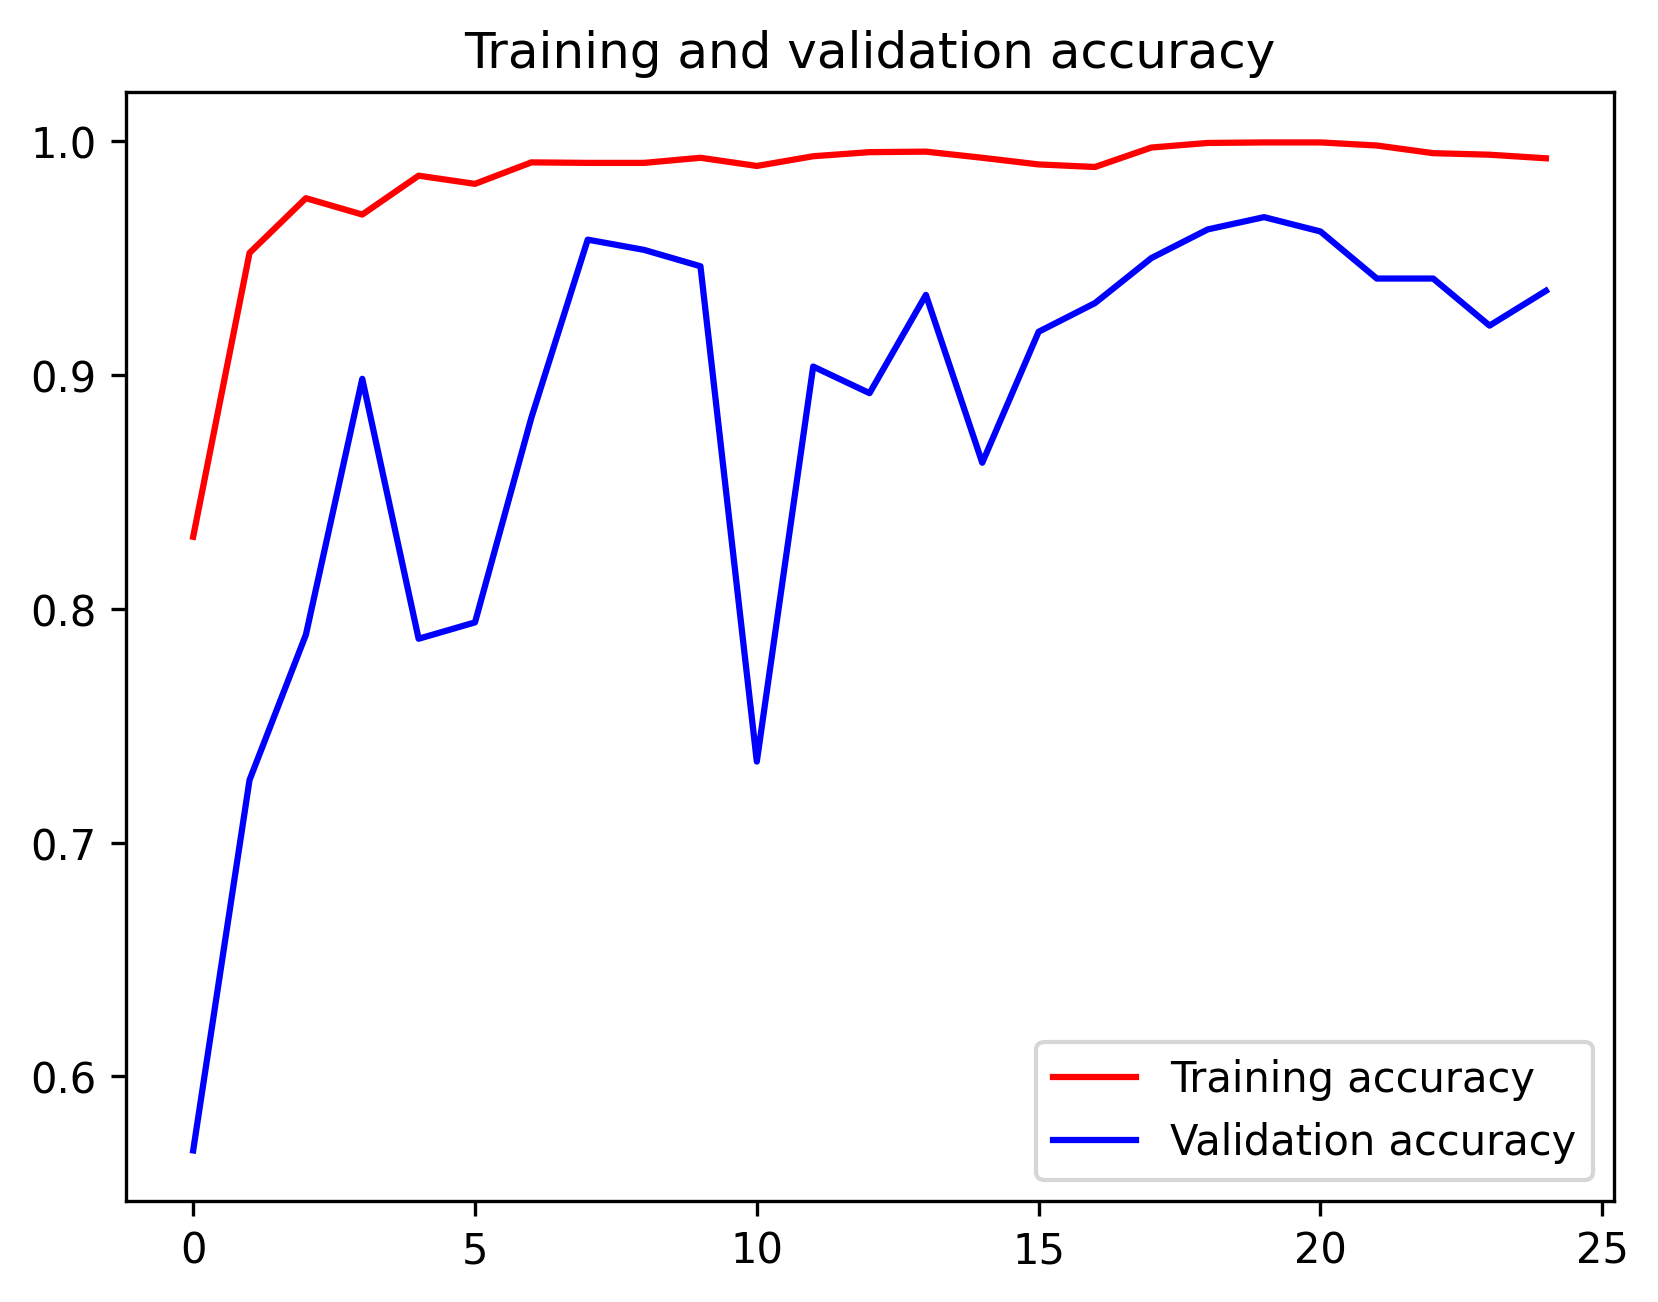

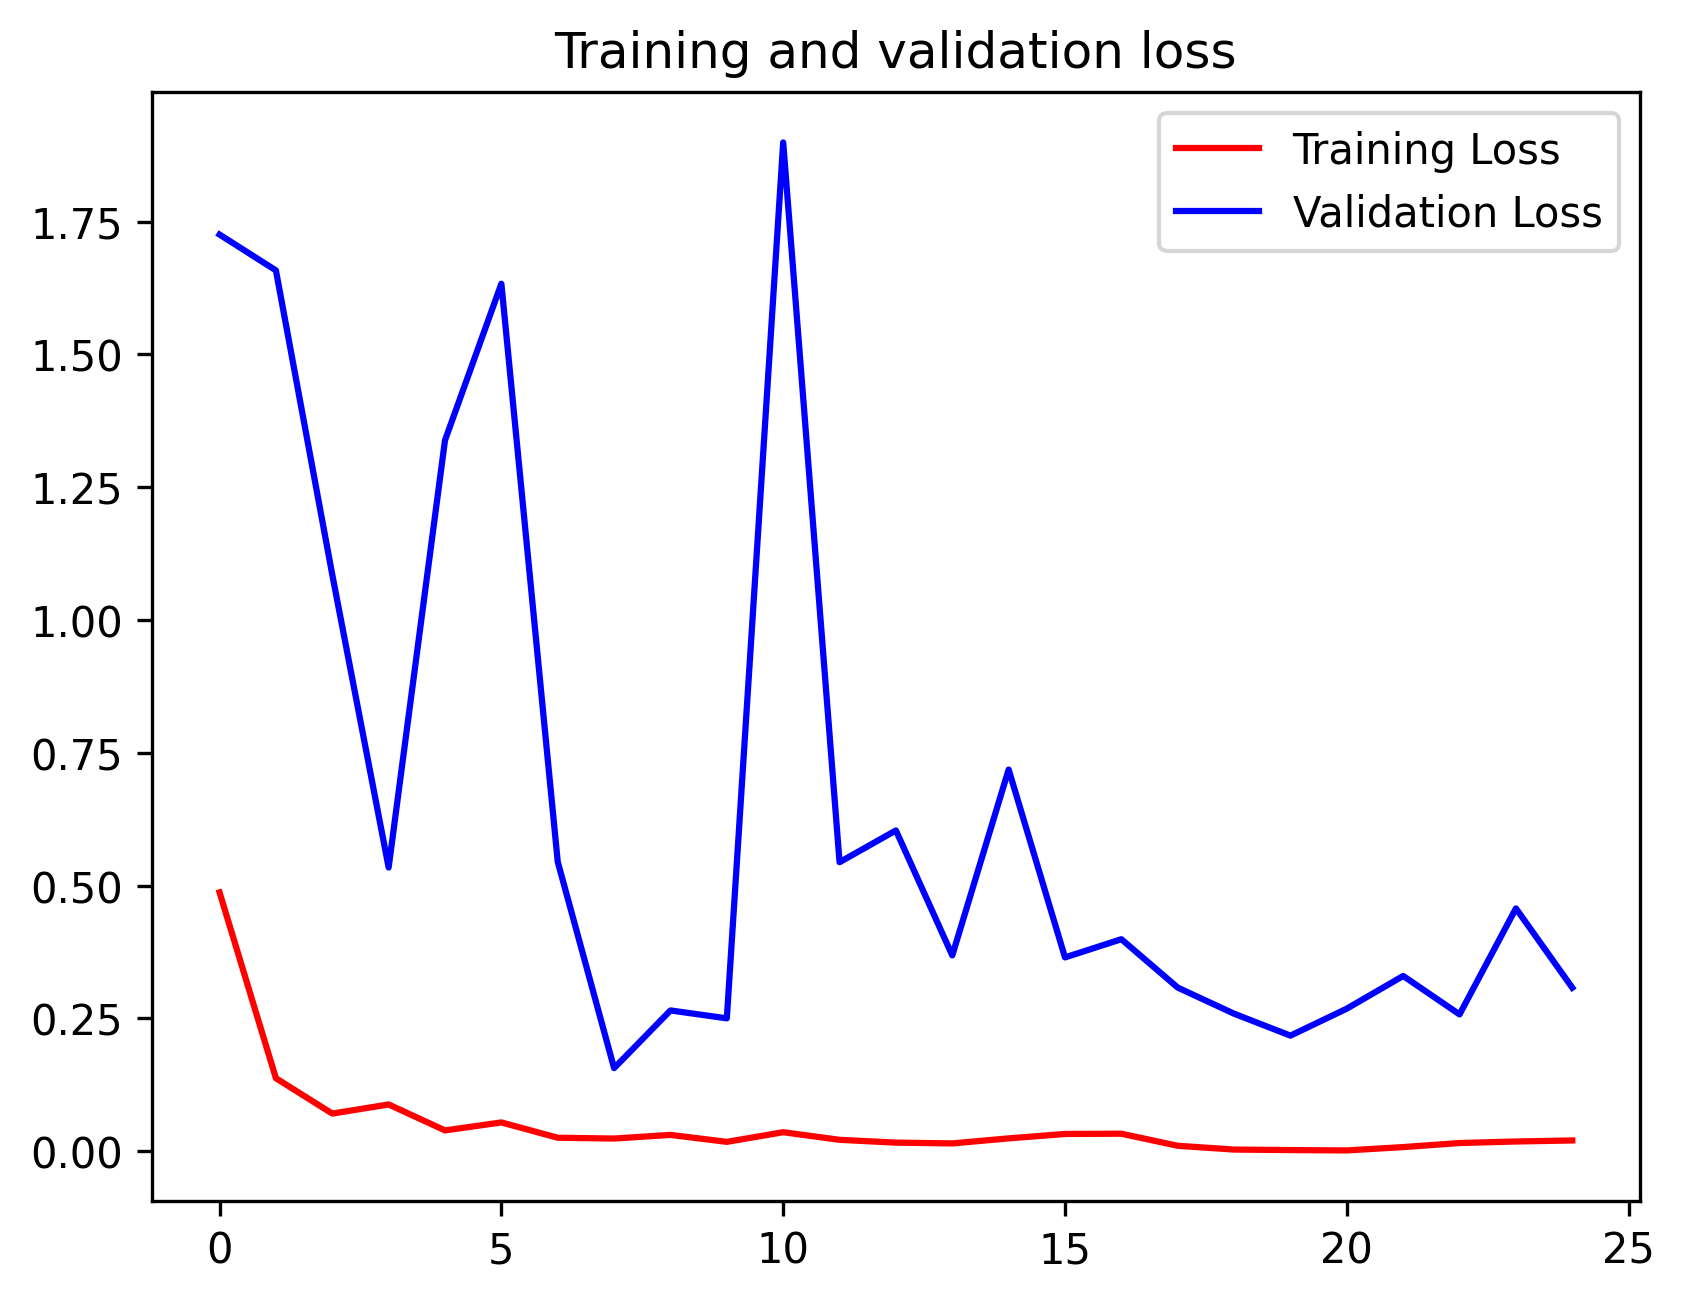

In [61]:
import matplotlib.pyplot as plt
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']
loss = history8.history['loss']
val_loss = history8.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### LSTM

### GoogLeNet

### 9. Xception

In [62]:
with tpu_strategy.scope():
    base_model9 = tf.keras.applications.Xception(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model9.layers[:10]:
        layer.trainable = False
    x = base_model9.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions9 = Dense(4, activation='softmax')(x)
    model9 = Model(inputs=base_model9.inputs, outputs=predictions9)
    model9.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

83683744/83683744 [==============================] - 0s 0us/step


In [63]:
# model9.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [64]:
history9=model9.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model9.save('model9.h5')

Epoch 1/25


2024-06-03 17:04:03.843599: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:04:04.398817: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.4494 - accuracy: 0.8298

2024-06-03 17:05:03.546512: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:05:03.733193: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 93s 1s/step - loss: 0.4494 - accuracy: 0.8298 - val_loss: 6.3851 - val_accuracy: 0.6567
Epoch 2/25
36/36 [==============================] - 4s 105ms/step - loss: 0.1327 - accuracy: 0.9549 - val_loss: 3.9777 - val_accuracy: 0.6287
Epoch 3/25
36/36 [==============================] - 4s 103ms/step - loss: 0.0973 - accuracy: 0.9751 - val_loss: 1.3606 - val_accuracy: 0.7995
Epoch 4/25
36/36 [==============================] - 4s 104ms/step - loss: 0.0600 - accuracy: 0.9807 - val_loss: 5.4198 - val_accuracy: 0.7224
Epoch 5/25
36/36 [==============================] - 4s 105ms/step - loss: 0.0505 - accuracy: 0.9867 - val_loss: 1.7783 - val_accuracy: 0.7207
Epoch 6/25
36/36 [==============================] - 4s 104ms/step - loss: 0.0446 - accuracy: 0.9875 - val_loss: 0.4953 - val_accuracy: 0.8660
Epoch 7/25
36/36 [==============================] - 8s 223ms/step - loss: 0.0105 - accuracy: 0.9965 - val_loss: 0.0883 - val_accuracy: 0.9764
Epoch 8/25
36/36 [=

In [65]:
xception_evaluation = model9.evaluate(val_ds)
xception_evaluation[1]*100

11/11 [==============================] - 7s 600ms/step - loss: 1.2756 - accuracy: 0.8215


82.15103149414062

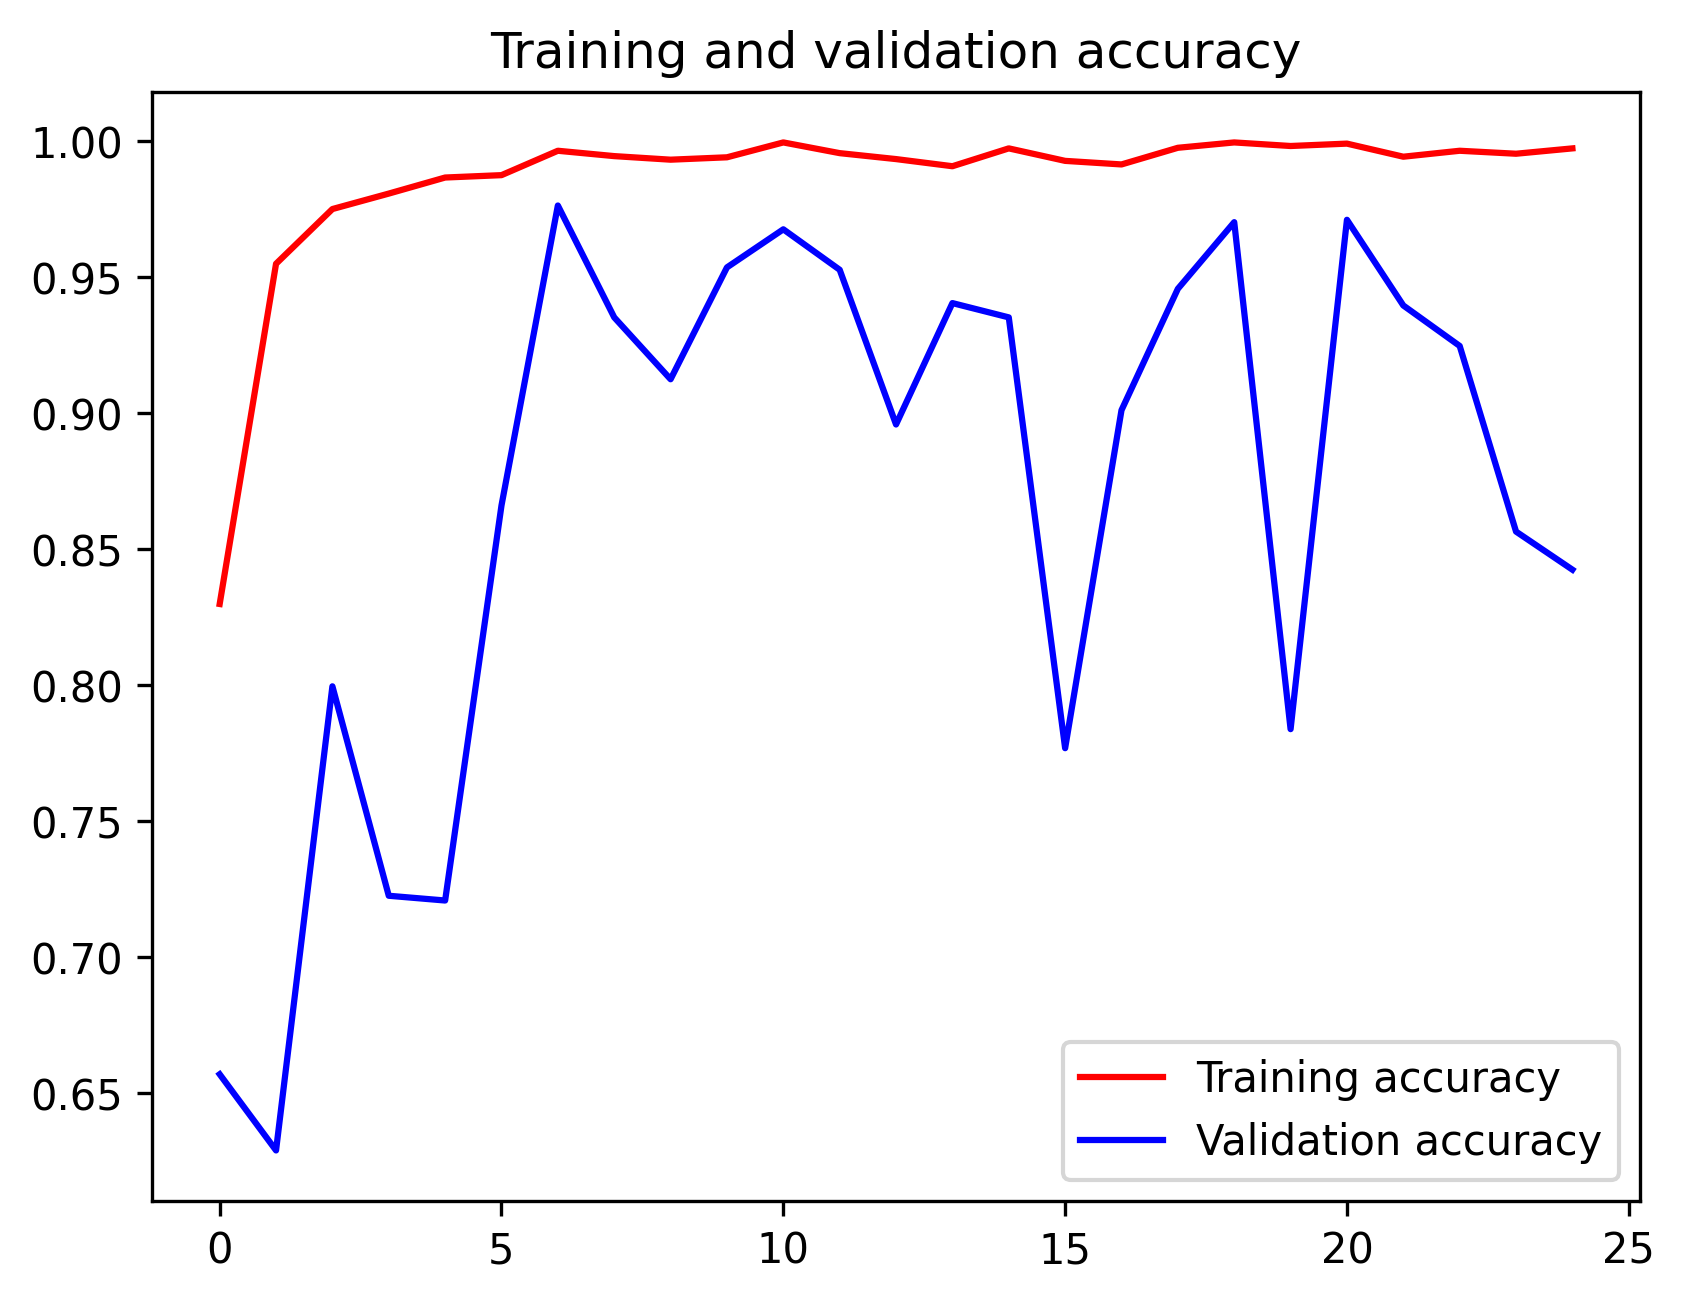

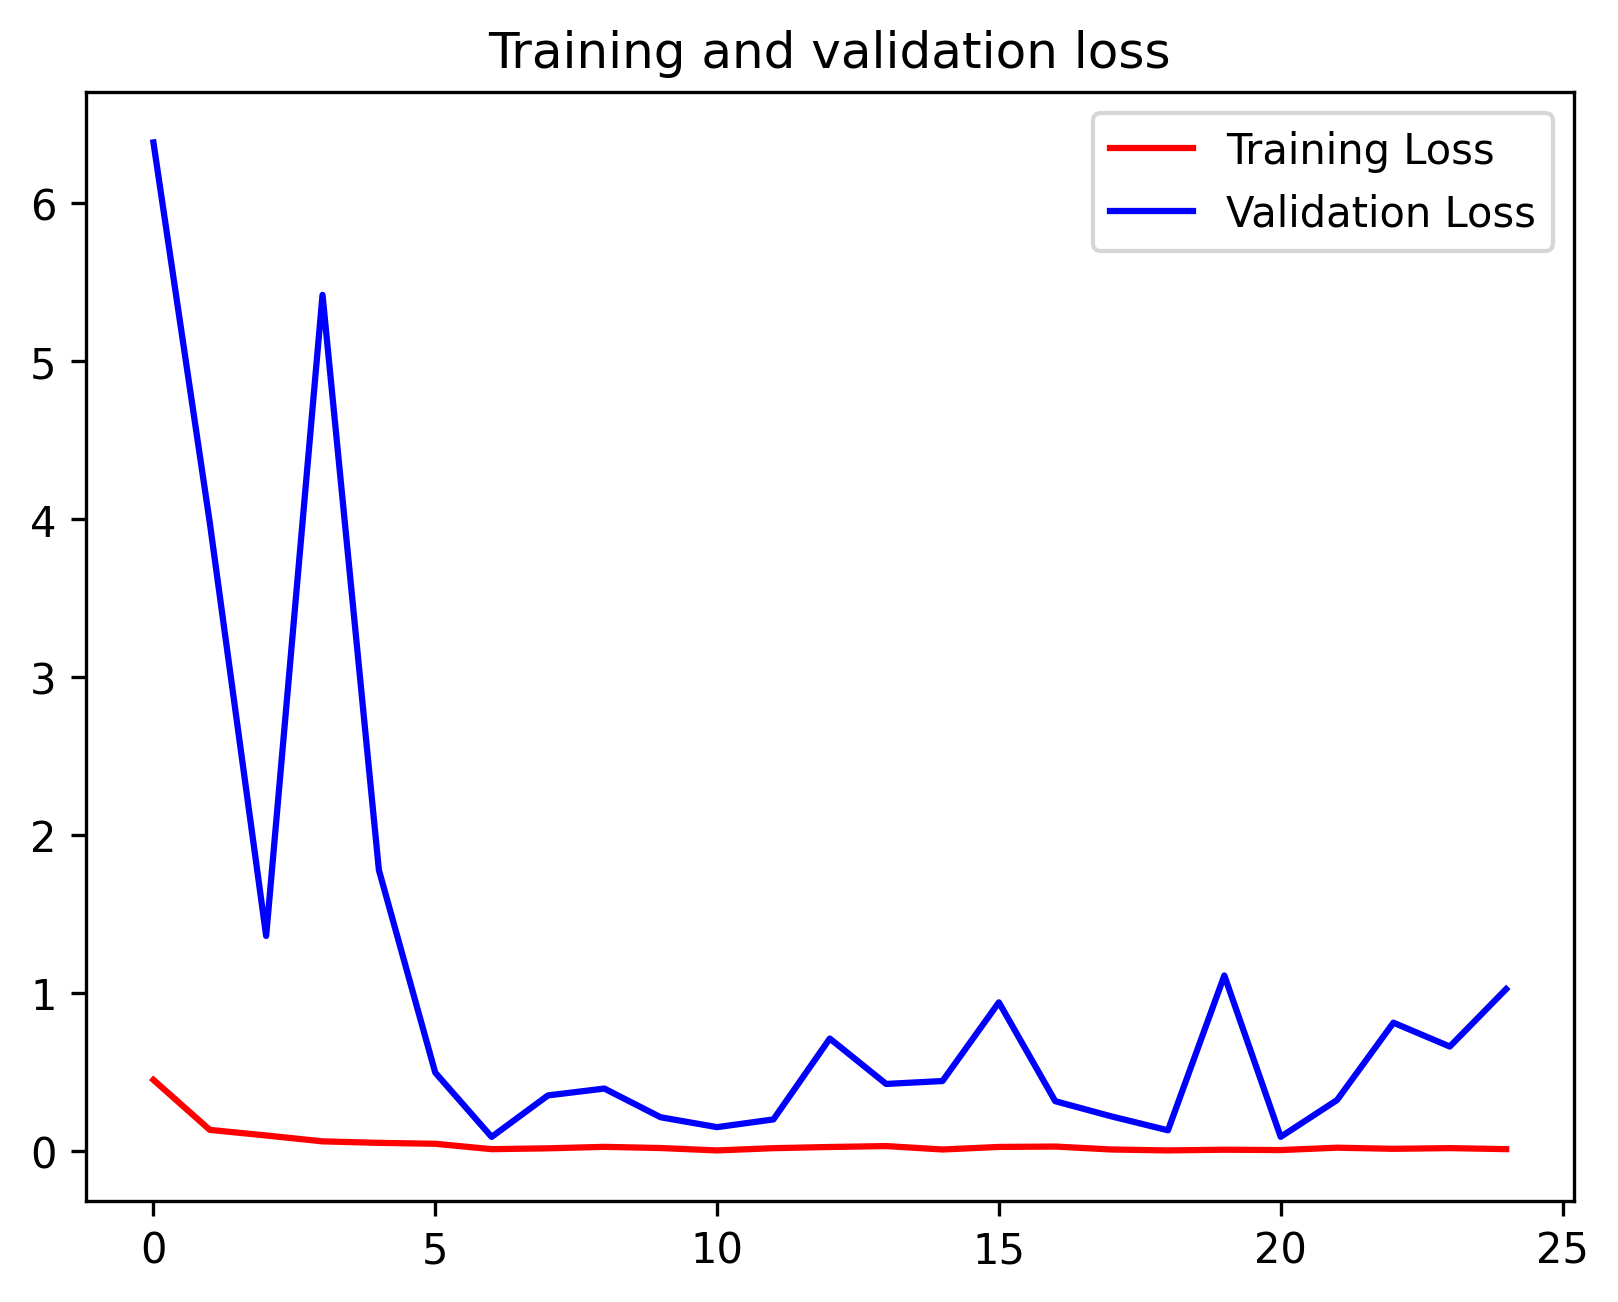

In [66]:
import matplotlib.pyplot as plt
acc = history9.history['accuracy']
val_acc = history9.history['val_accuracy']
loss = history9.history['loss']
val_loss = history9.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 10. ResNet-152

In [67]:
with tpu_strategy.scope():

    base_model10 = tf.keras.applications.ResNet152(
                        input_shape=(224, 224, 3),
                        weights='imagenet',
                        include_top=False)
    # Freeze the first 10 layers
    for layer in base_model10.layers[:10]:
        layer.trainable = False
    x = base_model10.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    predictions10 = Dense(4, activation='softmax')(x)
    model10 = Model(inputs=base_model10.inputs, outputs=predictions10)
    model10.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

234698864/234698864 [==============================] - 2s 0us/step


In [68]:
# model10.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [69]:
history10=model10.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

model10.save('model10.h5')

Epoch 1/25


2024-06-03 17:08:57.583647: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:08:59.963427: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.7435 - accuracy: 0.7630

2024-06-03 17:11:55.370465: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:11:55.847058: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 271s 3s/step - loss: 0.7435 - accuracy: 0.7630 - val_loss: 12122021953536.0000 - val_accuracy: 0.2811
Epoch 2/25
36/36 [==============================] - 8s 209ms/step - loss: 0.3040 - accuracy: 0.8919 - val_loss: 14207649.0000 - val_accuracy: 0.2811
Epoch 3/25
36/36 [==============================] - 8s 214ms/step - loss: 0.1950 - accuracy: 0.9354 - val_loss: 25203.4219 - val_accuracy: 0.2566
Epoch 4/25
36/36 [==============================] - 8s 211ms/step - loss: 0.1400 - accuracy: 0.9530 - val_loss: 166.8501 - val_accuracy: 0.3888
Epoch 5/25
36/36 [==============================] - 8s 214ms/step - loss: 0.0984 - accuracy: 0.9700 - val_loss: 2.1336 - val_accuracy: 0.6900
Epoch 6/25
36/36 [==============================] - 8s 212ms/step - loss: 0.0708 - accuracy: 0.9770 - val_loss: 14.3931 - val_accuracy: 0.4299
Epoch 7/25
36/36 [==============================] - 8s 212ms/step - loss: 0.0574 - accuracy: 0.9792 - val_loss: 0.4592 - val_accuracy

In [70]:
resnet152_evaluation = model10.evaluate(val_ds)
resnet152_evaluation[1]*100

11/11 [==============================] - 12s 1s/step - loss: 0.1423 - accuracy: 0.9756


97.55911231040955

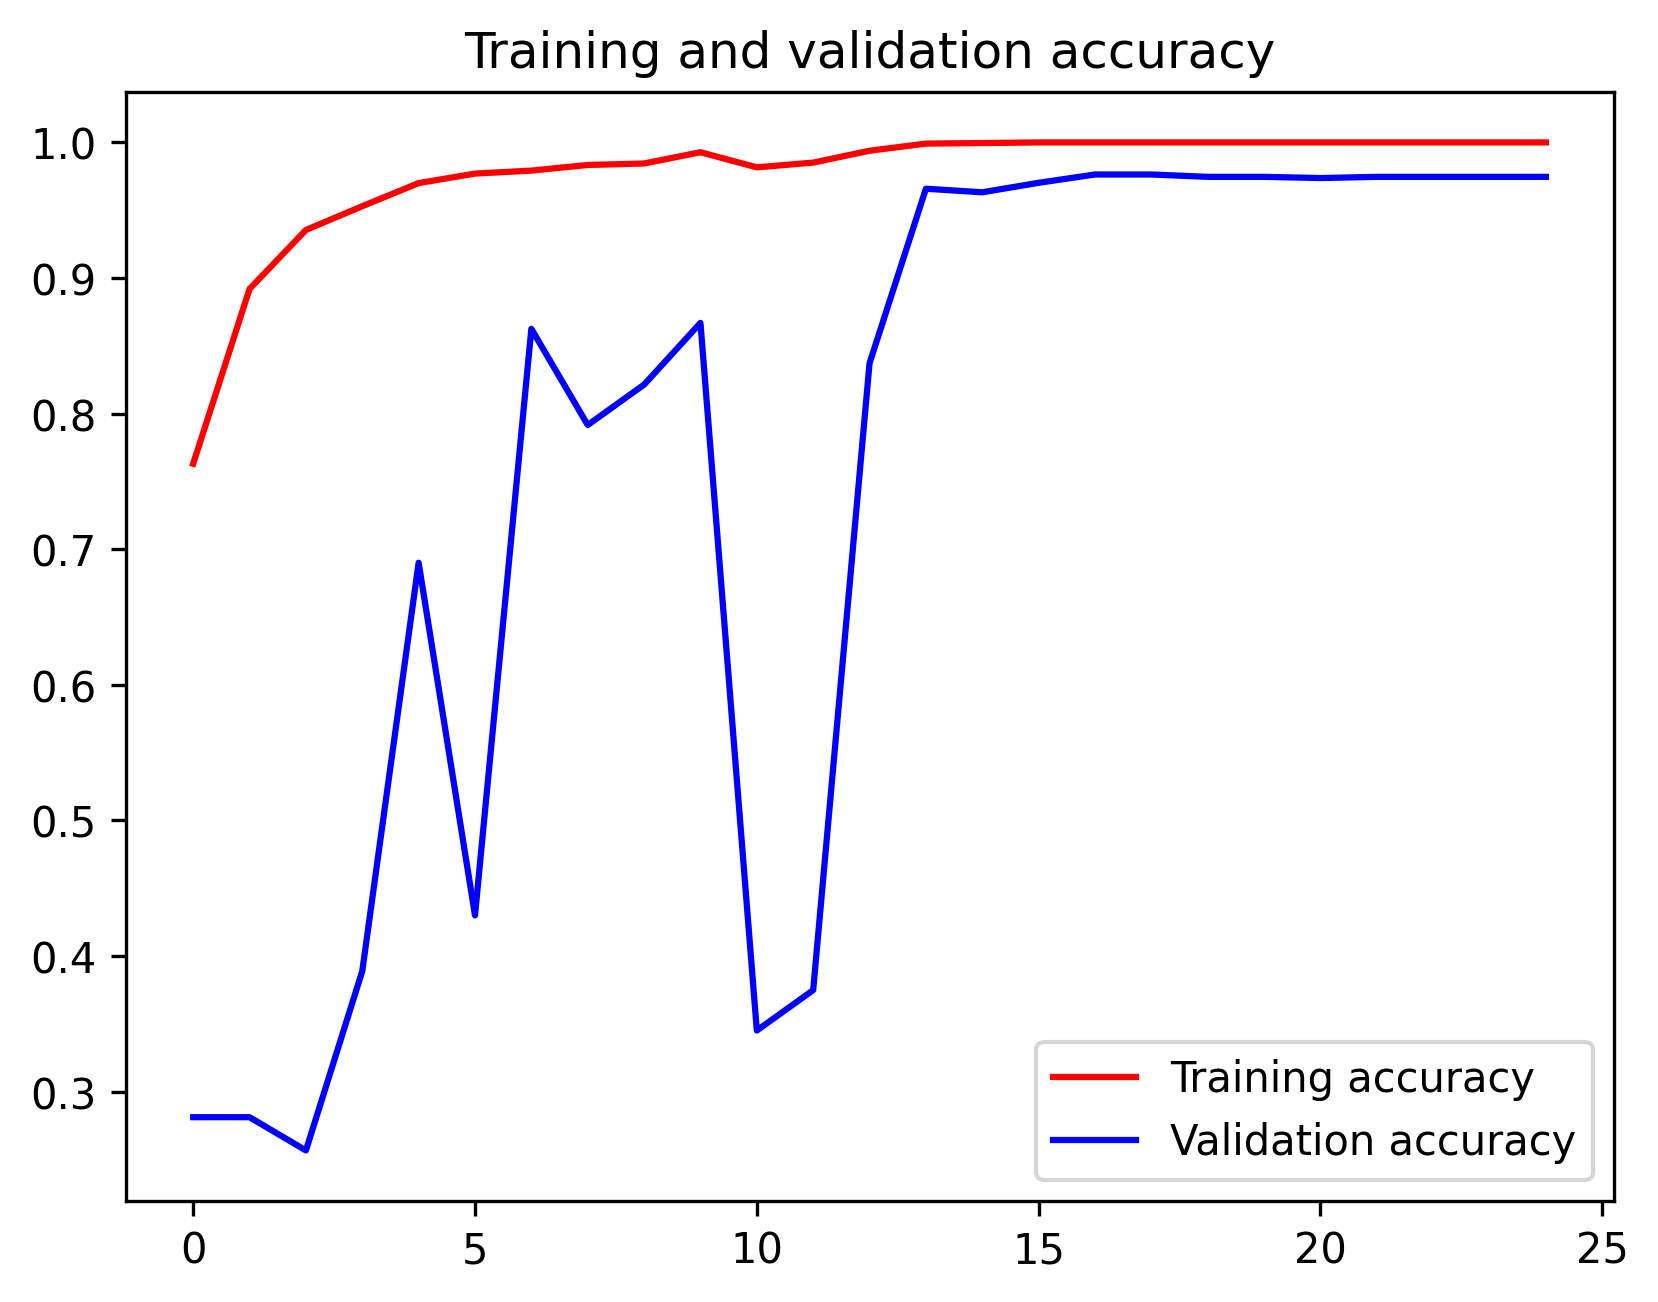

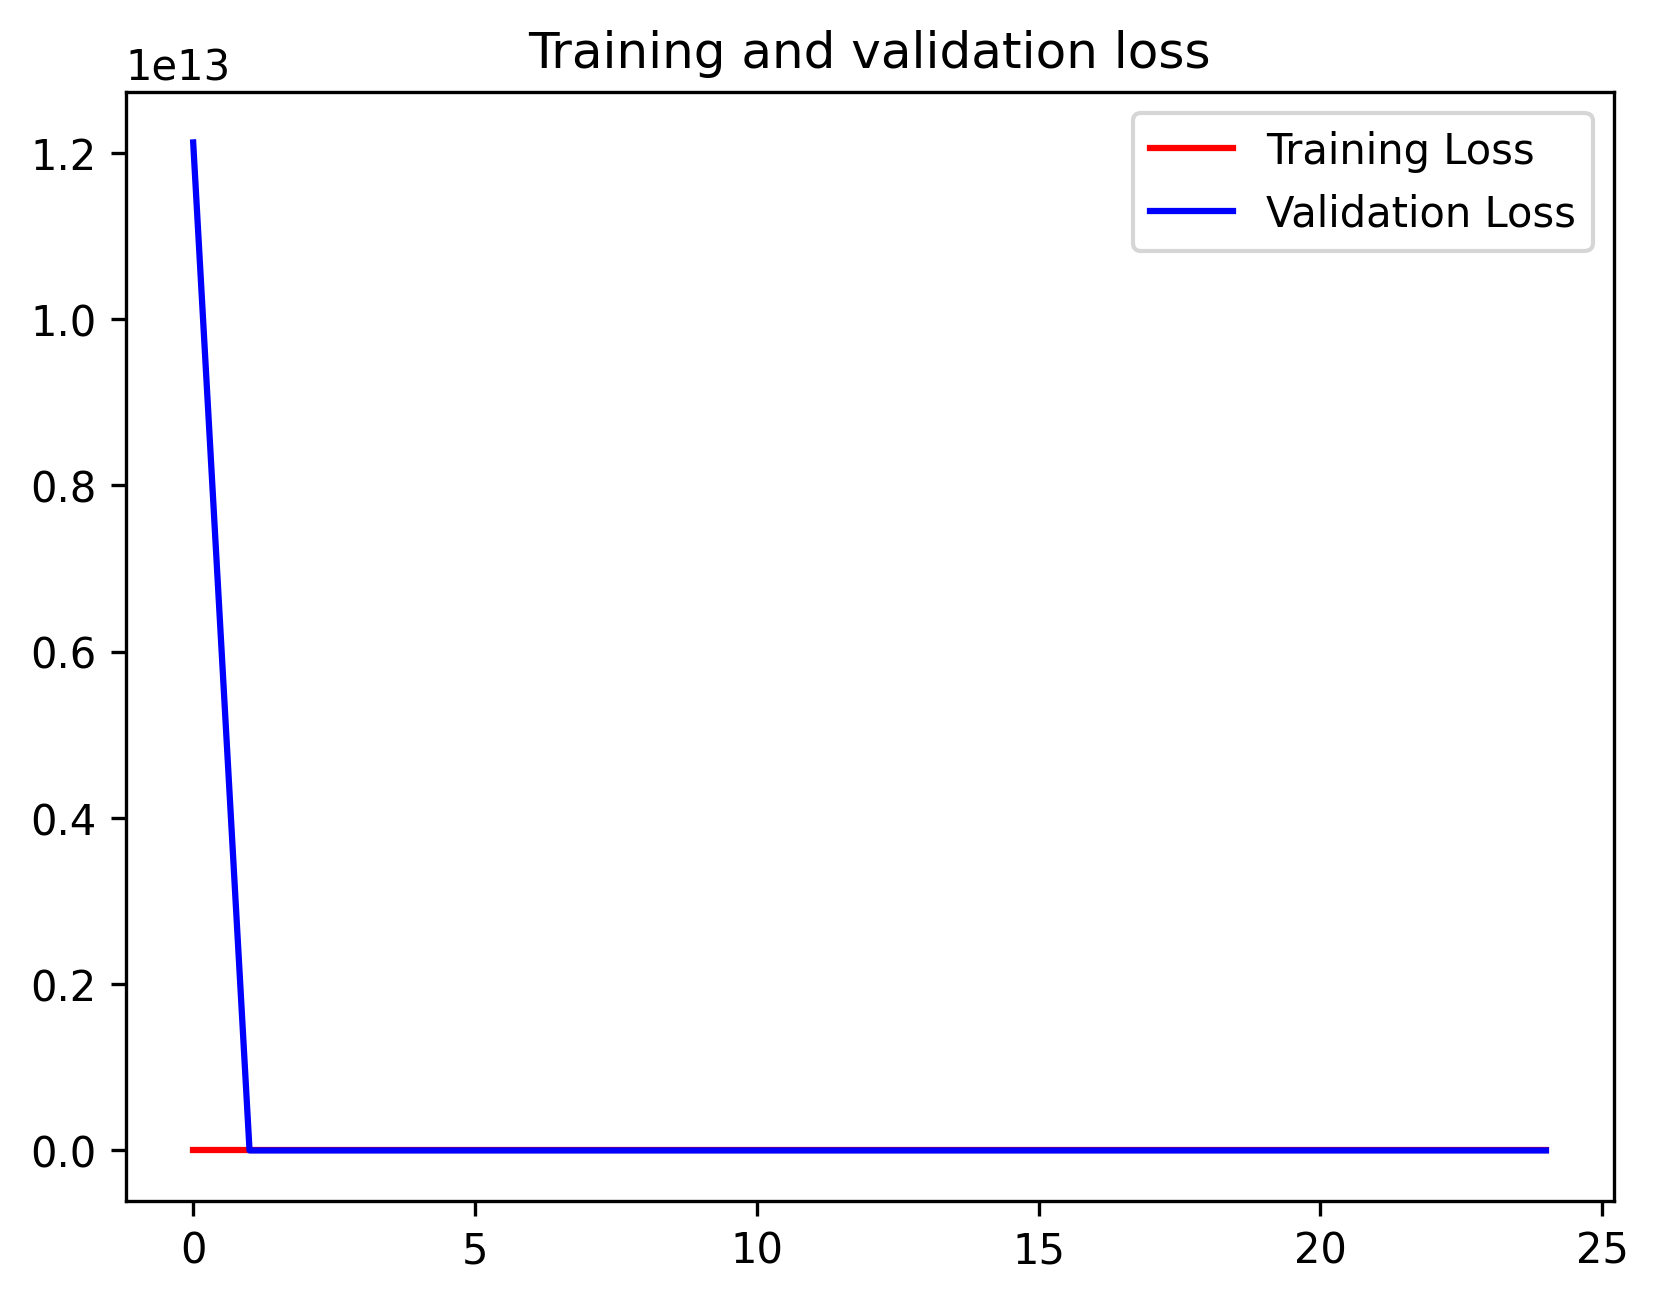

In [71]:
import matplotlib.pyplot as plt
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']
loss = history10.history['loss']
val_loss = history10.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### MLP

#### Model Checkpoint

In [72]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/kaggle/working-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

### Building Ensemble Model

In [73]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
with tpu_strategy.scope():
#     model_1 = load_model('/kaggle/working/model1.h5')
#     model_1 = Model(inputs=model_1.inputs,
#                     outputs=model_1.outputs,
#                     name='name_of_model_1')

    model_2 = load_model('/kaggle/working/model2.h5')
    model_2 = Model(inputs=model_2.inputs,
                    outputs=model_2.outputs,
                    name='name_of_model_2')

    model_3 = load_model('/kaggle/working/model3.h5')
    model_3 = Model(inputs=model_3.inputs,
                    outputs=model_3.outputs,
                    name='name_of_model_3')


    model_5 = load_model('/kaggle/working/model5.h5')
    model_5 = Model(inputs=model_5.inputs,
                    outputs=model_5.outputs,
                    name='name_of_model_5')
    
    model_7 = load_model('/kaggle/working/model7.h5')
    model_7 = Model(inputs=model_7.inputs,
                    outputs=model_7.outputs,
                    name='name_of_model_7')
    
#     model_9 = load_model('/kaggle/working/model9.h5')
#     model_9 = Model(inputs=model_9.inputs,
#                     outputs=model_9.outputs,
#                     name='name_of_model_9')
    
    

    models = [model_2, model_3, model_5,model_7]
    model_input = Input(shape=(224, 224, 3))
    model_outputs = [model(model_input) for model in models]
    ensemble_output = Average()(model_outputs)
    ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')
    ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])


In [74]:
# ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])


In [75]:
history=ensemble_model.fit(
  train_ds,
  validation_data=test_ds,
  epochs=25)

Epoch 1/25


2024-06-03 17:19:35.905661: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:19:40.235970: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - ETA: 0s - loss: 0.2277 - accuracy: 0.9991

2024-06-03 17:25:34.081345: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:25:34.965671: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


36/36 [==============================] - 529s 7s/step - loss: 0.2277 - accuracy: 0.9991 - val_loss: 0.5405 - val_accuracy: 0.9483
Epoch 2/25
36/36 [==============================] - 13s 363ms/step - loss: 0.2396 - accuracy: 0.9954 - val_loss: 0.6268 - val_accuracy: 0.8827
Epoch 3/25
36/36 [==============================] - 13s 363ms/step - loss: 0.2422 - accuracy: 0.9934 - val_loss: 0.5921 - val_accuracy: 0.8704
Epoch 4/25
36/36 [==============================] - 13s 366ms/step - loss: 0.2443 - accuracy: 0.9937 - val_loss: 0.4484 - val_accuracy: 0.9431
Epoch 5/25
36/36 [==============================] - 13s 366ms/step - loss: 0.2347 - accuracy: 0.9961 - val_loss: 0.7709 - val_accuracy: 0.6305
Epoch 6/25
36/36 [==============================] - 13s 368ms/step - loss: 0.2326 - accuracy: 0.9980 - val_loss: 0.6113 - val_accuracy: 0.8739
Epoch 7/25
36/36 [==============================] - 13s 368ms/step - loss: 0.2296 - accuracy: 0.9972 - val_loss: 0.5402 - val_accuracy: 0.9221
Epoch 8/25
3

In [76]:
ensemble_evaluation = ensemble_model.evaluate(val_ds)
ensemble_evaluation[1]*100

11/11 [==============================] - 24s 2s/step - loss: 0.3665 - accuracy: 0.9558


95.57589888572693

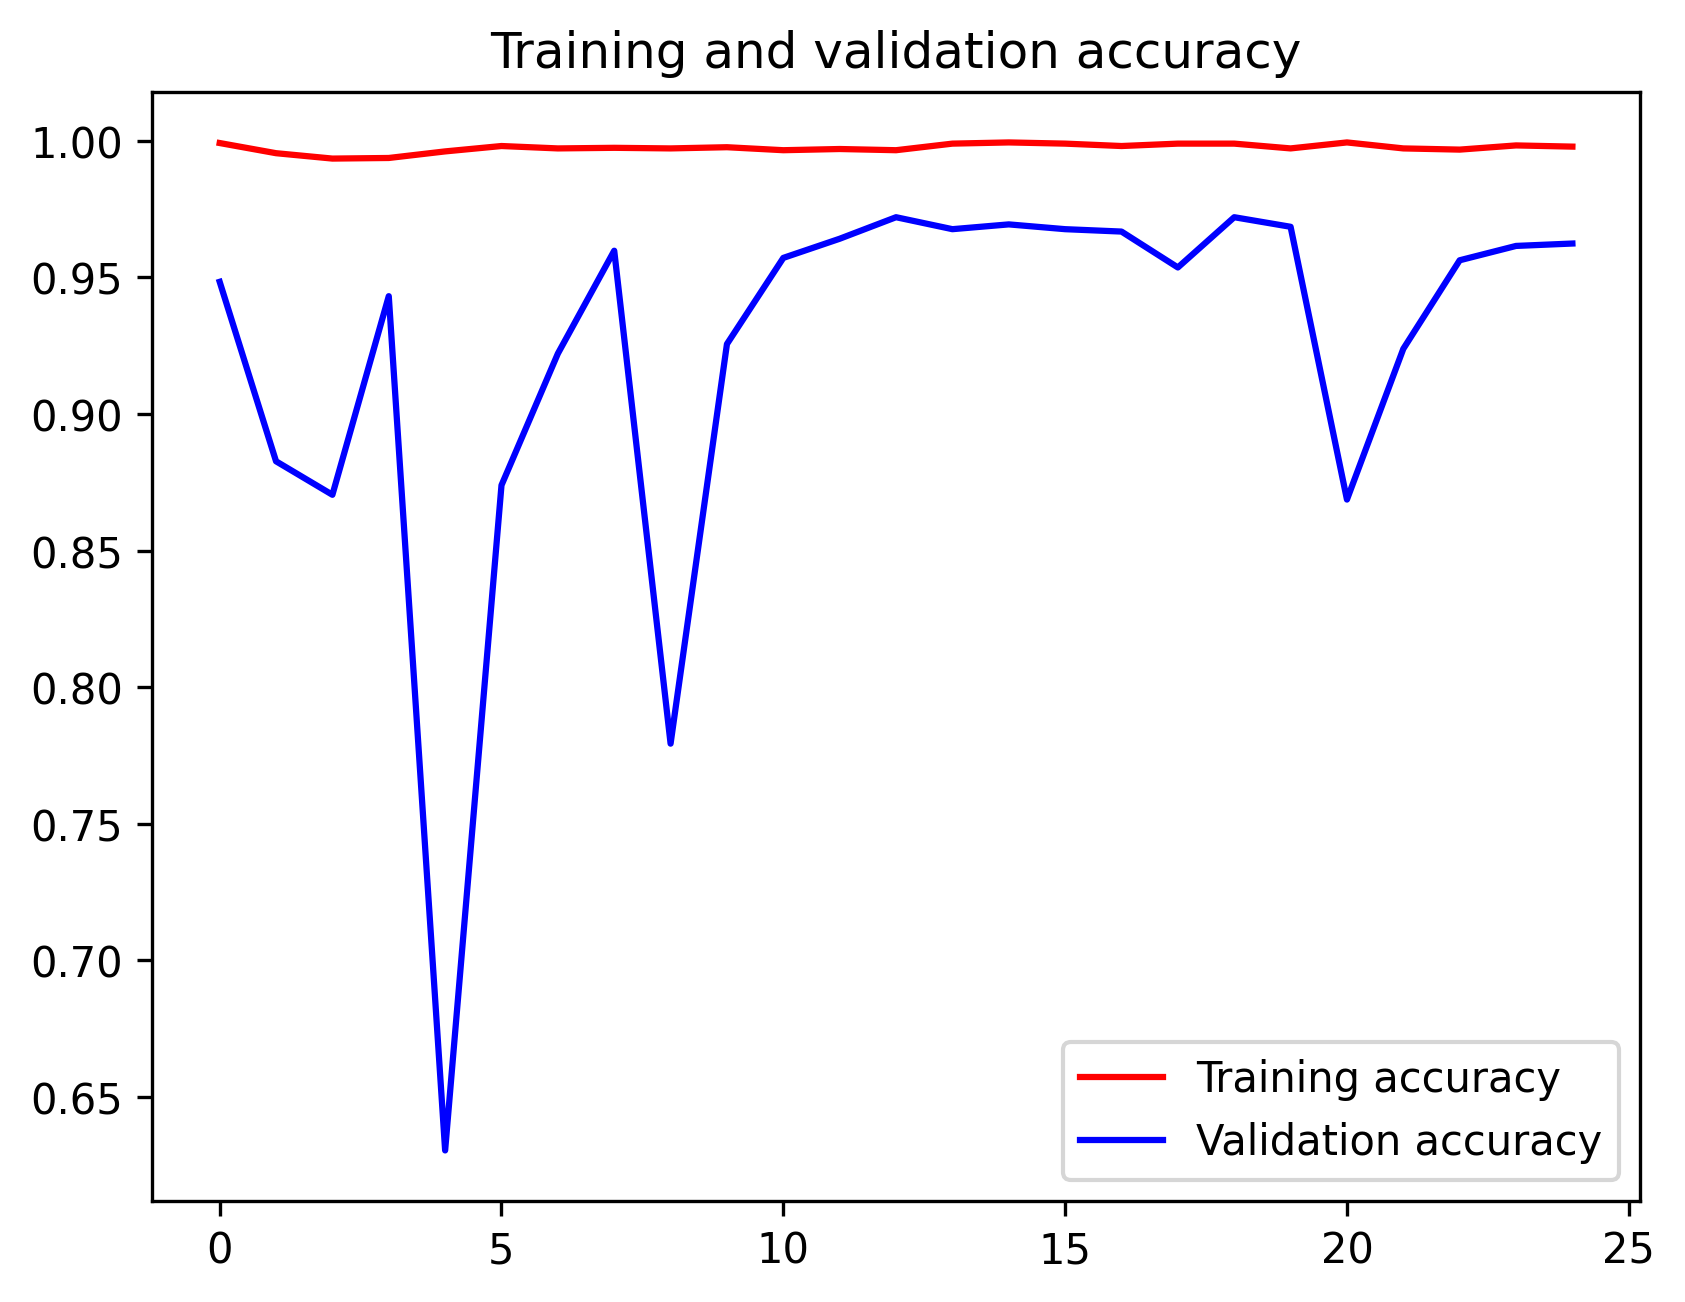

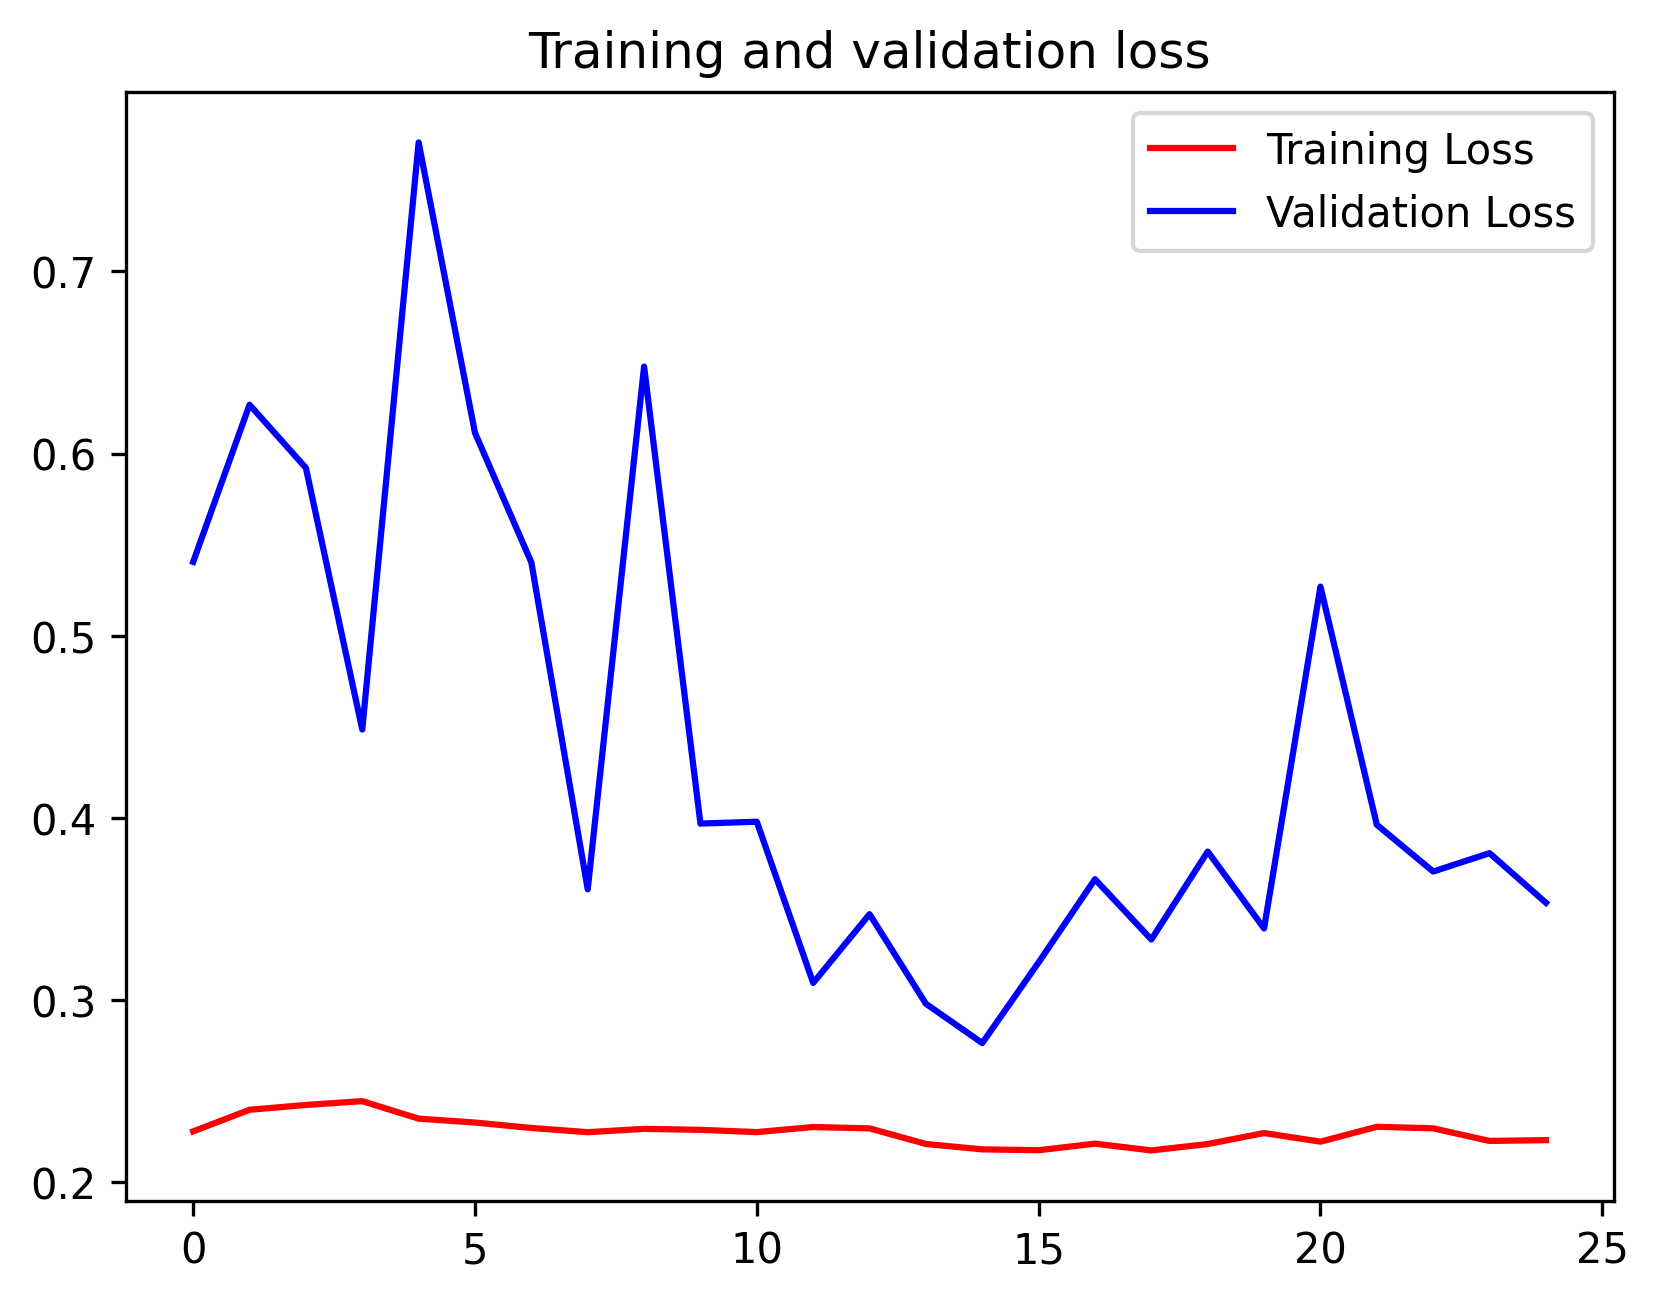

In [77]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [78]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)
print(train_label.shape)

test_label = np.concatenate([y for x, y in test_ds], axis=0)
print(test_label.shape)

(4570,)
(1142,)


/tmp/ipykernel_15/865114918.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = ensemble_model.predict_generator(test_ds, 1600)
2024-06-03 17:32:30.082920: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2024-06-03 17:32:30.919932: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


Confusion Matrix
[[205  25   0   1]
 [  0 286   6   5]
 [  0   2 318   1]
 [  0   1   2 290]]
Classification Report
              precision    recall  f1-score   support

      glioma       1.00      0.89      0.94       231
  meningioma       0.91      0.96      0.94       297
     notumor       0.98      0.99      0.98       321
   pituitary       0.98      0.99      0.98       293

    accuracy                           0.96      1142
   macro avg       0.97      0.96      0.96      1142
weighted avg       0.96      0.96      0.96      1142



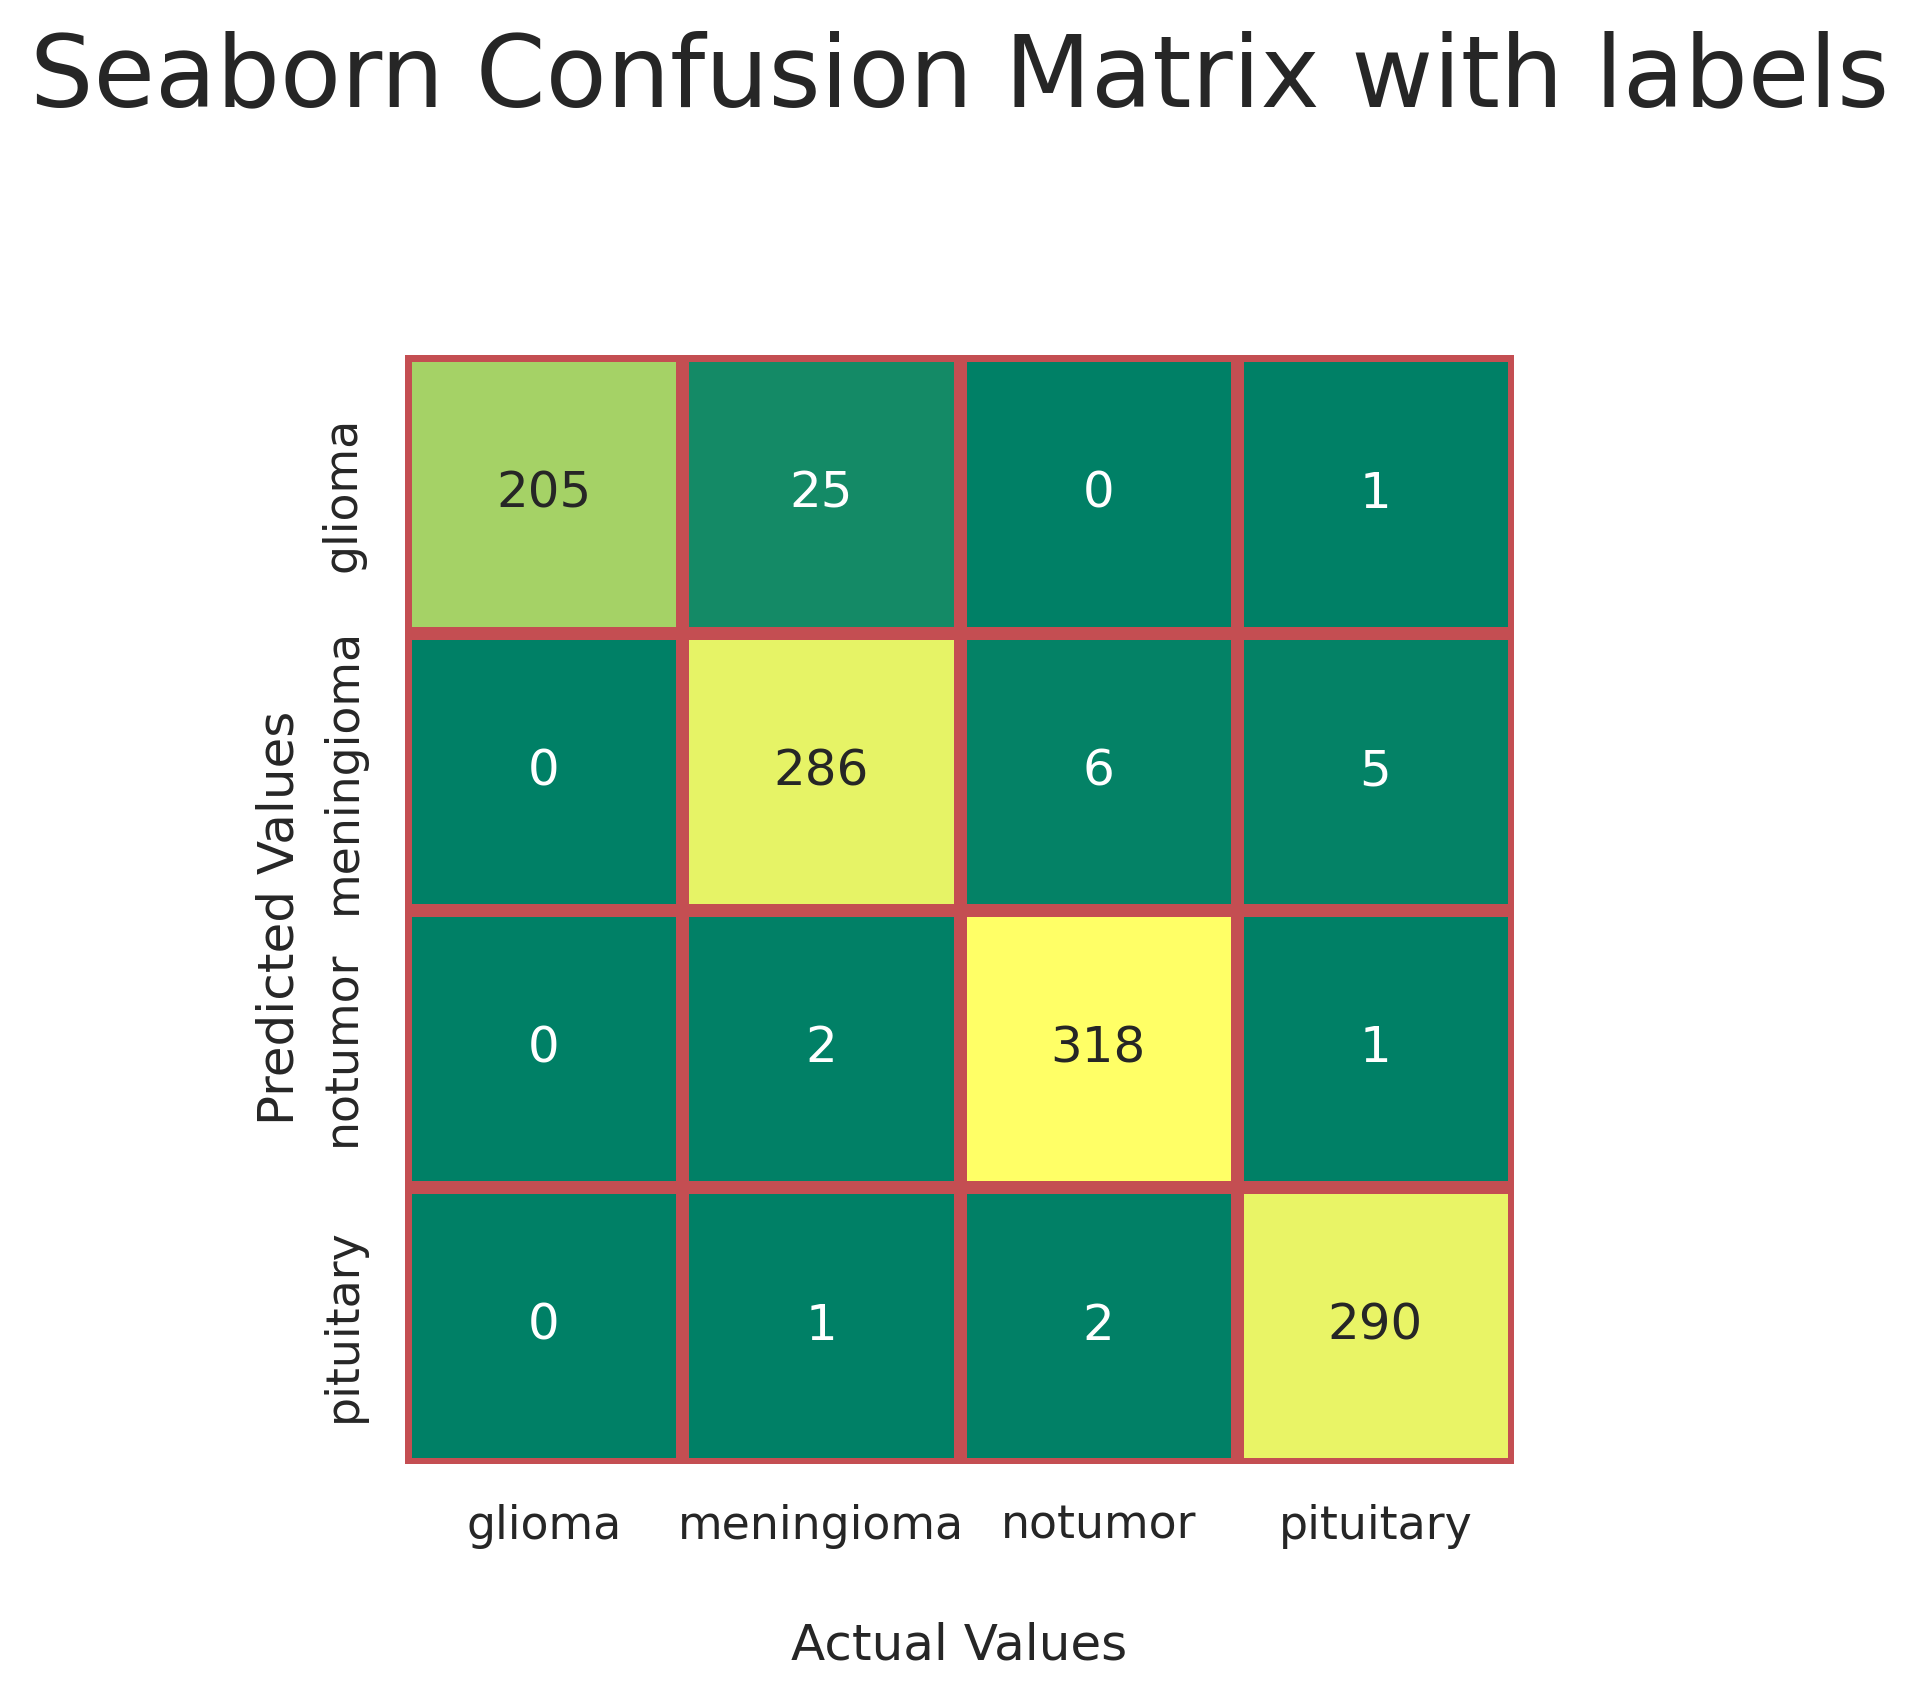

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = ensemble_model.predict_generator(test_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
print(classification_report(test_label, y_pred, target_names=target_names))

import seaborn as sns
sns.set(font_scale=1.0)
ax=sns.heatmap(cm, annot=True, cmap='summer', cbar=False, linewidths=3, linecolor='r', square=True, xticklabels=target_names,yticklabels=target_names,fmt='')
#sns.heatmap(cm, annot=True,annot_kws={"size": 22})
sns.set(font_scale = 2.0)
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nActual Values')
ax.set_ylabel('Predicted Values ');